In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

# Pred - Prey Model Functions - May, 2023

In [2]:
def dNdt(H, P, parameters_dict):
    #Unpacking herbivore parameters:
    r_H = parameters_dict['r_H'] # growth rate of herbivores
    K_H = parameters_dict['K_H'] # carrying capacity of herbivores
    theta_H = parameters_dict['theta_H'] # immigration of herbivores
    c = parameters_dict['c'] # addition to predator from prey
    d = parameters_dict['d'] # value of H when predation half its max value
    q_H = parameters_dict['q_H'] # proportionality constant for herbivore harvest
    E_H = parameters_dict['E_H'] # Effort for herbivore harvest
    #Unpacking predator parameters:
    r_P = parameters_dict['r_P'] # growth rate of predator 
    K_P = parameters_dict['K_P'] # carrying capactiy of predators 
    b = parameters_dict['b'] # mortality to prey from predator
    theta_P = parameters_dict['theta_P'] # immigration of predators  
    q_P = parameters_dict['q_P'] # proportionality constant for predators harvest
    E_P = parameters_dict['E_P'] # Effort for predator harvest
    
    #Calculate the derivative 
    dH = r_H*H*(1-H/K_H) - (c*H*P)/(d+H) + theta_H - q_H*E_H*H
    dP = r_P*P*(1-P/K_P) + (b*H*P)/(d+H) + theta_P - q_P*E_P*P
    
    return dH, dP

In [3]:
# Function: numerical solver, 2nd order RK 

def RK2(H, P, parameters_dict):
    H_init = H
    P_init = P 
    
    dH1, dP1 = dNdt(H,P,parameters_dict)
    
    H1 = H + 0.5*dH1
    P1 = P + 0.5*dP1
    
    dH2, dP2 = dNdt(H1,P1,parameters_dict)
    
    dH_ave = (dH1+dH2)/2 
    dP_ave = (dP1+dP2)/2 
    
    H = H_init + dH_ave
    P = P_init + dP_ave
    
    #Calculate harvest 
    q_H = parameters_dict['q_H'] #proportionality constant for herbivore harvest 
    E_H = parameters_dict['E_H'] #Effort for herbivore harvest
    
    q_P = parameters_dict['q_P'] #proportionality constant for herbivore harvest 
    E_P = parameters_dict['E_P'] #Effort for herbivore harvest
    
    herbivore_harvest = q_H*E_H*H
    predator_harvest = q_P*E_P*P
    
    return H, P, herbivore_harvest, predator_harvest

In [4]:
# Function to run the model 

def run_model(INIT_H, INIT_P, parameters_dict):
    
    numyears = parameters_dict['numyears']
    
    H_array = np.zeros(numyears+1)
    P_array = np.zeros(numyears+1)
    H_harvest_array = np.zeros(numyears+1)
    P_harvest_array = np.zeros(numyears+1)
    
    H_array[0] = INIT_H #Starting biomass of herbivore
    P_array[0] = INIT_P #Starting biomass of predator 
    H_harvest_array[0] = 0
    P_harvest_array[0] = 0
    
    for i in np.arange(0,numyears):
        H_array[i+1], P_array[i+1], H_harvest_array[i+1], P_harvest_array[i+1] \
            = RK2(H_array[i], P_array[i], parameters_dict)
        i = i+1
    
    return H_array, P_array, H_harvest_array, P_harvest_array

# Test Plot

In [57]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.2 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.3 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }


In [58]:
H0 = 1000
P0 = 100

H_array, P_array, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)

T_array = np.add(H_array, P_array)

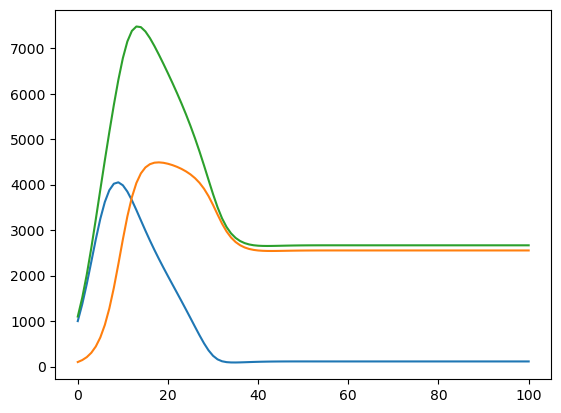

In [59]:
plt.plot(H_array)
plt.plot(P_array)
plt.plot(T_array)
plt.rcParams.update(plt.rcParamsDefault)

In [60]:
T_array

array([1100.        , 1518.39217   , 2025.44239281, 2607.79637528,
       3239.55092172, 3889.83953565, 4533.60792848, 5157.08613862,
       5752.16995978, 6303.68247042, 6781.71563749, 7149.26177217,
       7381.30499089, 7478.41872797, 7463.665116  , 7369.0268243 ,
       7223.59190103, 7048.51519611, 6856.98100589, 6656.09196746,
       6448.87381762, 6235.78961022, 6015.73353979, 5786.65054933,
       5545.94924917, 5290.86837765, 5018.97157619, 4728.99696332,
       4422.35058317, 4105.43413448, 3792.13485171, 3503.33766273,
       3259.21376503, 3068.79095139, 2928.60801437, 2829.26286967,
       2760.88568842, 2715.21233482, 2685.84869042, 2667.98528135,
       2658.04561241, 2653.39343839, 2652.10997936, 2652.82580797,
       2654.59139694, 2656.77494877, 2658.98047629, 2660.98200435,
       2662.67135381, 2664.01767042, 2665.03707625, 2665.77084388,
       2666.27049859, 2666.58832084, 2666.77186517, 2666.86131158,
       2666.88869216, 2666.87825992, 2666.84746848, 2666.80820

# 3 x 3 Time Series - Varied b and c values

In [30]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.3 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.3 # additional growth of P due to H
theta_P = 10 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

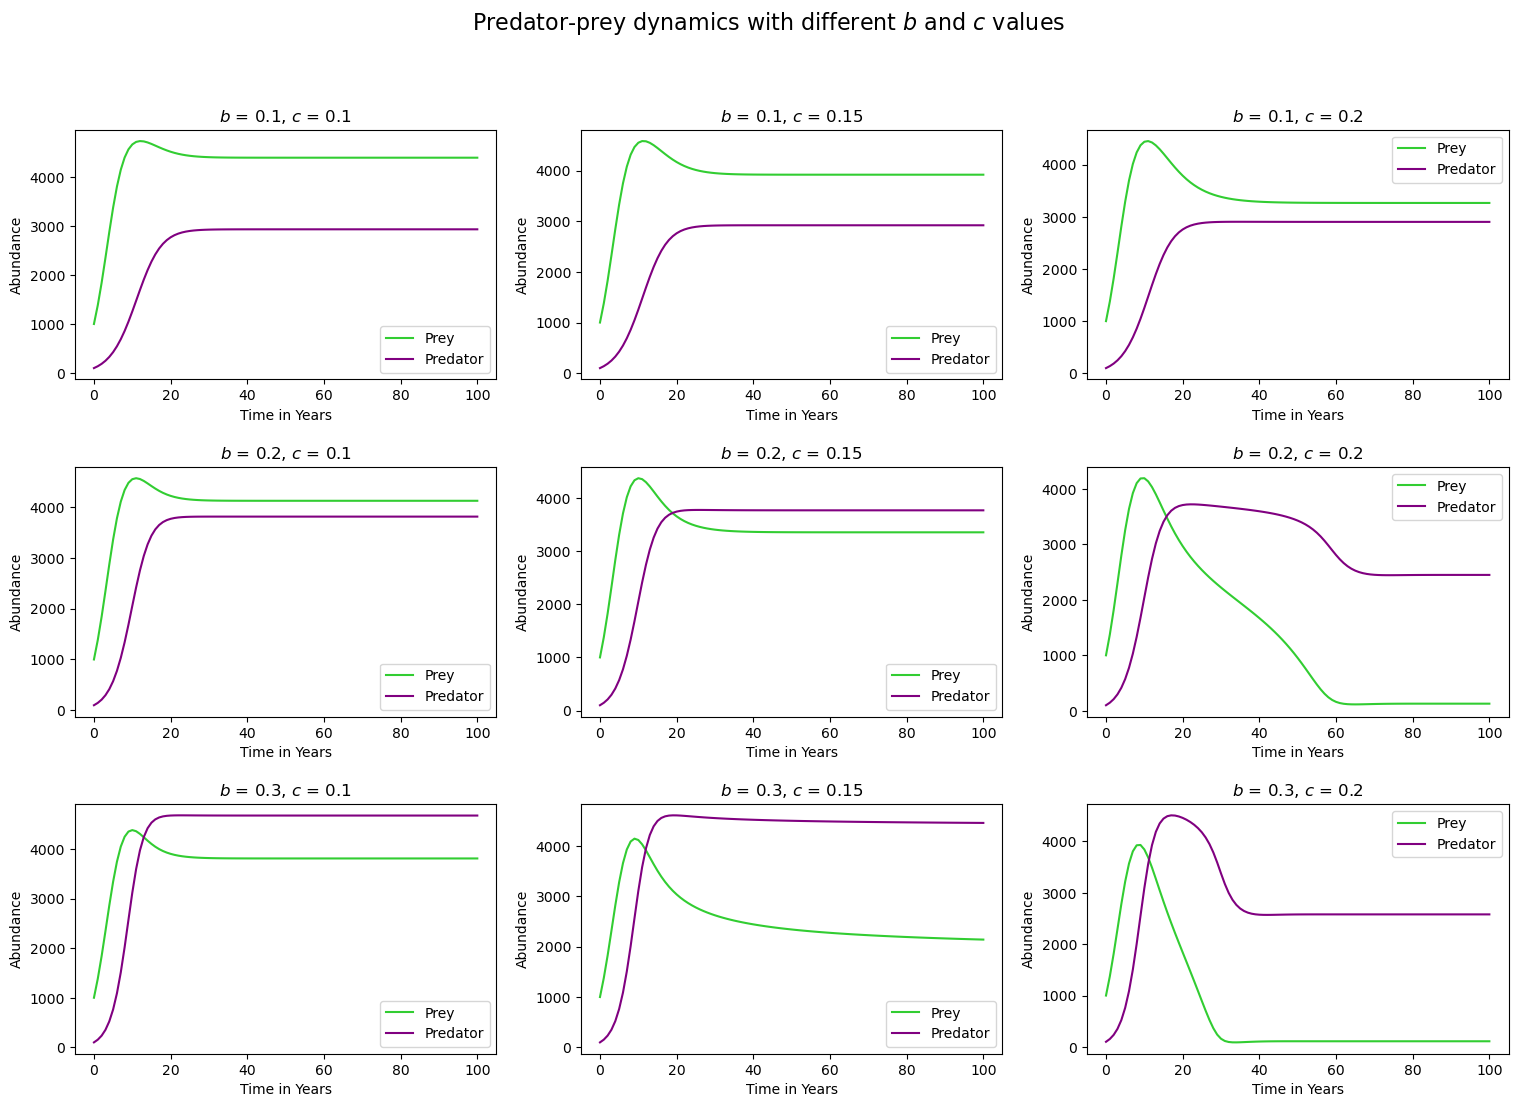

In [31]:
# Define the range of b and c values to plot
b_values = [0.1, 0.2, 0.3]
c_values = [0.1, 0.15, 0.2]

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(18.5, 12))

# Loop through each combination of b and c values
for i in range(3):
    for j in range(3):
        # Update the b and c values in the parameter dictionary
        parameters_dict['b'] = b_values[i]
        parameters_dict['c'] = c_values[j]
        
        # Run the model and extract H and P arrays
        H_array, P_array, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
        
        # Plot the H and P arrays in the corresponding subplot
        axs[i,j].plot(range(numyears+1), H_array, label='Prey', color="limegreen")
        axs[i,j].plot(range(numyears+1), P_array, label='Predator', color="purple")
        axs[i,j].set_title(f'$b$ = {b_values[i]}, $c$ = {c_values[j]}')
        axs[i,j].set_xlabel('Time in Years')
        axs[i,j].set_ylabel('Abundance')
        axs[i,j].legend()

# Add a common title to the figure
fig.suptitle('Predator-prey dynamics with different $b$ and $c$ values', fontsize=16)
plt.subplots_adjust(wspace=0.2, hspace=0.35)

plt.savefig("manuscript_figs/time_series_abundance.jpg",
            format='jpeg',
            dpi=300,
            bbox_inches='tight')

plt.show()

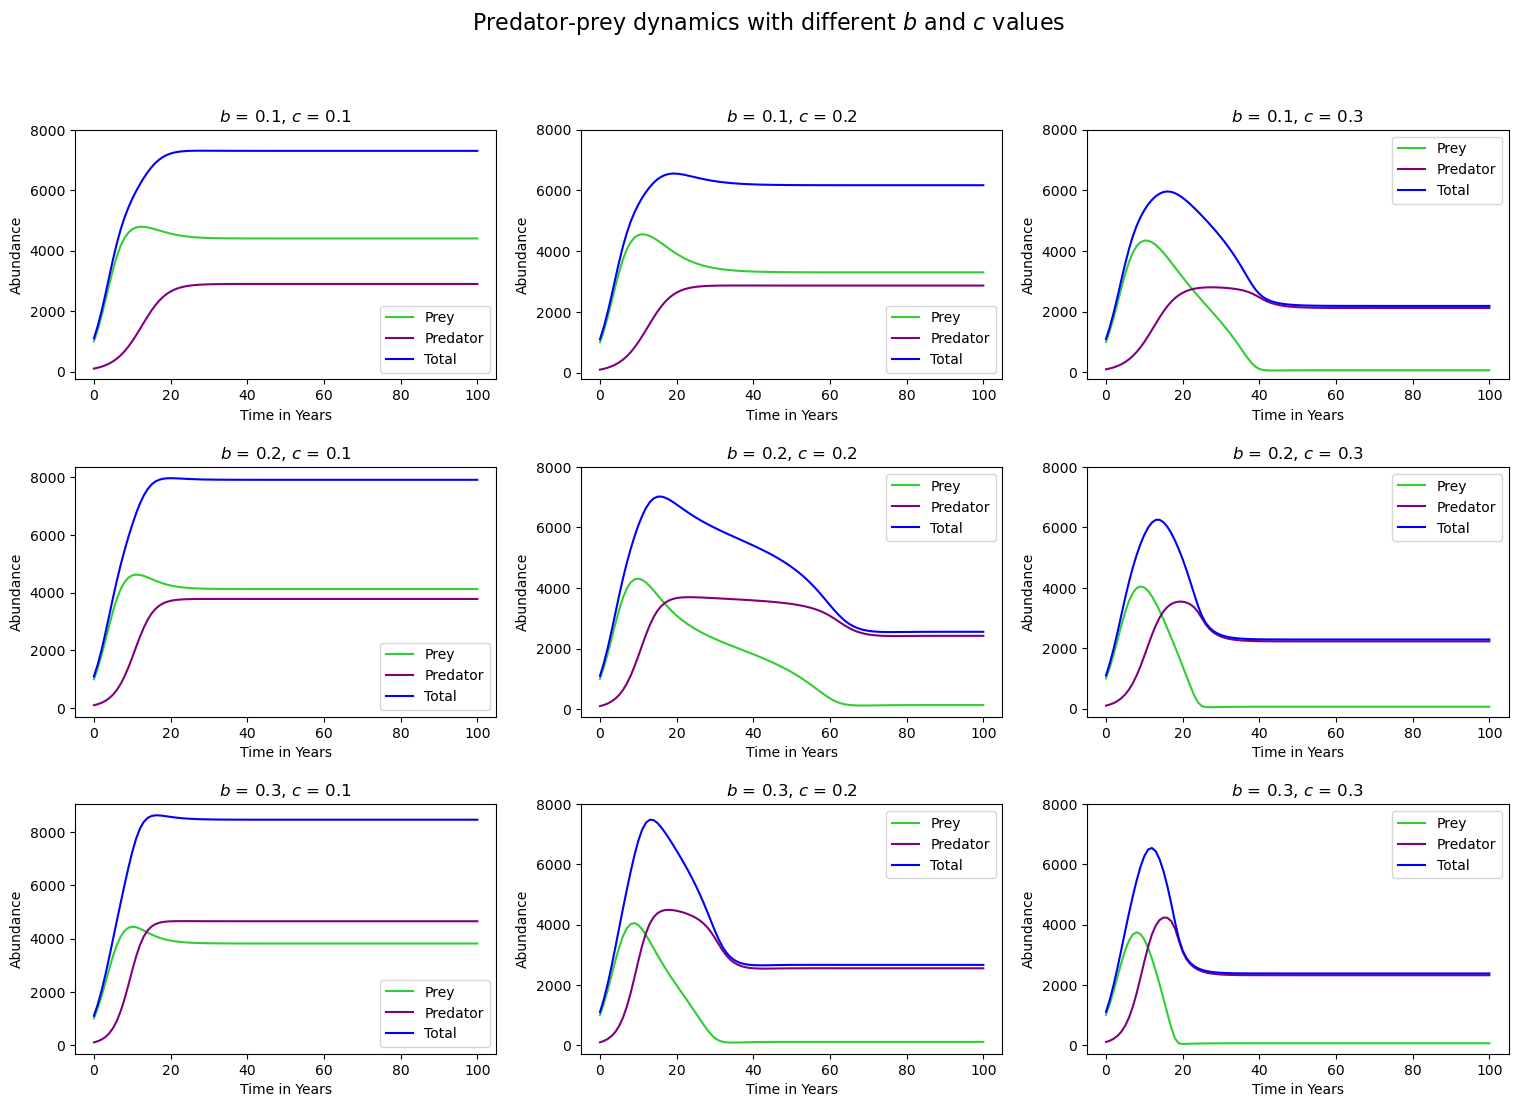

In [61]:
# Define the range of b and c values to plot
b_values = [0.1, 0.2, 0.3]
c_values = [0.1, 0.2, 0.3]

# Y-axes Values 
my_yticks = [0, 2000, 4000, 6000, 8000]

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(18.5, 12))

# Loop through each combination of b and c values
for i in range(3):
    for j in range(3):
        # Update the b and c values in the parameter dictionary
        parameters_dict['b'] = b_values[i]
        parameters_dict['c'] = c_values[j]
        
        # Run the model and extract H and P arrays
        H_array, P_array, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
        
        # Add to get total abundance
        T_array = np.add(H_array, P_array)
        
        # Plot the H and P arrays in the corresponding subplot
        axs[i,j].plot(range(numyears+1), H_array, label='Prey', color="limegreen")
        axs[i,j].plot(range(numyears+1), P_array, label='Predator', color="purple")
        axs[i,j].plot(range(numyears+1), T_array, label='Total', color="blue")
        axs[i,j].set_title(f'$b$ = {b_values[i]}, $c$ = {c_values[j]}')
        axs[i,j].set_yticks(my_yticks)
        axs[i,j].set_xlabel('Time in Years')
        axs[i,j].set_ylabel('Abundance')
        axs[i,j].legend()

# Add a common title to the figure
fig.suptitle('Predator-prey dynamics with different $b$ and $c$ values', fontsize=16)
plt.subplots_adjust(wspace=0.2, hspace=0.35)

plt.savefig("manuscript_figs/time_series_abundance_total.jpg",
            format='jpeg',
            dpi=300,
            bbox_inches='tight')

plt.show()

In [18]:
T_array

array([1100.        , 1529.00669135, 2049.44305192, 2648.76577211,
       3302.17659497, 3979.7400314 , 4655.72312703, 5311.87780957,
       5930.51567891, 6484.15755891, 6935.08685601, 7250.17069862,
       7418.88989965, 7457.49404962, 7397.76316362, 7272.64398622,
       7107.99572483, 6920.85740482, 6720.96869768, 6512.98317307,
       6298.30076567, 6076.32000946, 5845.22892369, 5602.51873965,
       5345.40250892, 5071.33066947, 4778.8452309 , 4469.08535506,
       4148.18894387, 3830.01510435, 3536.02295048, 3287.49025606,
       3094.20340443, 2952.63246834, 2852.90009498, 2784.67734788,
       2739.37872758, 2710.41374232, 2692.8658679 , 2683.111418  ,
       2678.50575365, 2677.14541584, 2677.68894827, 2679.21934622,
       2681.13623217, 2683.07038979, 2684.81619027, 2686.2789828 ,
       2687.43519174, 2688.30309707, 2688.92236119, 2689.34045975,
       2689.60433432, 2689.75580892, 2689.82957312, 2689.85279924,
       2689.84570548, 2689.82258453, 2689.79298315, 2689.76284

# Add In Fishing Pressure 

### Define Params

In [35]:
#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.2 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.3 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

### For-loop to look at Predator Fishing (Abundance)

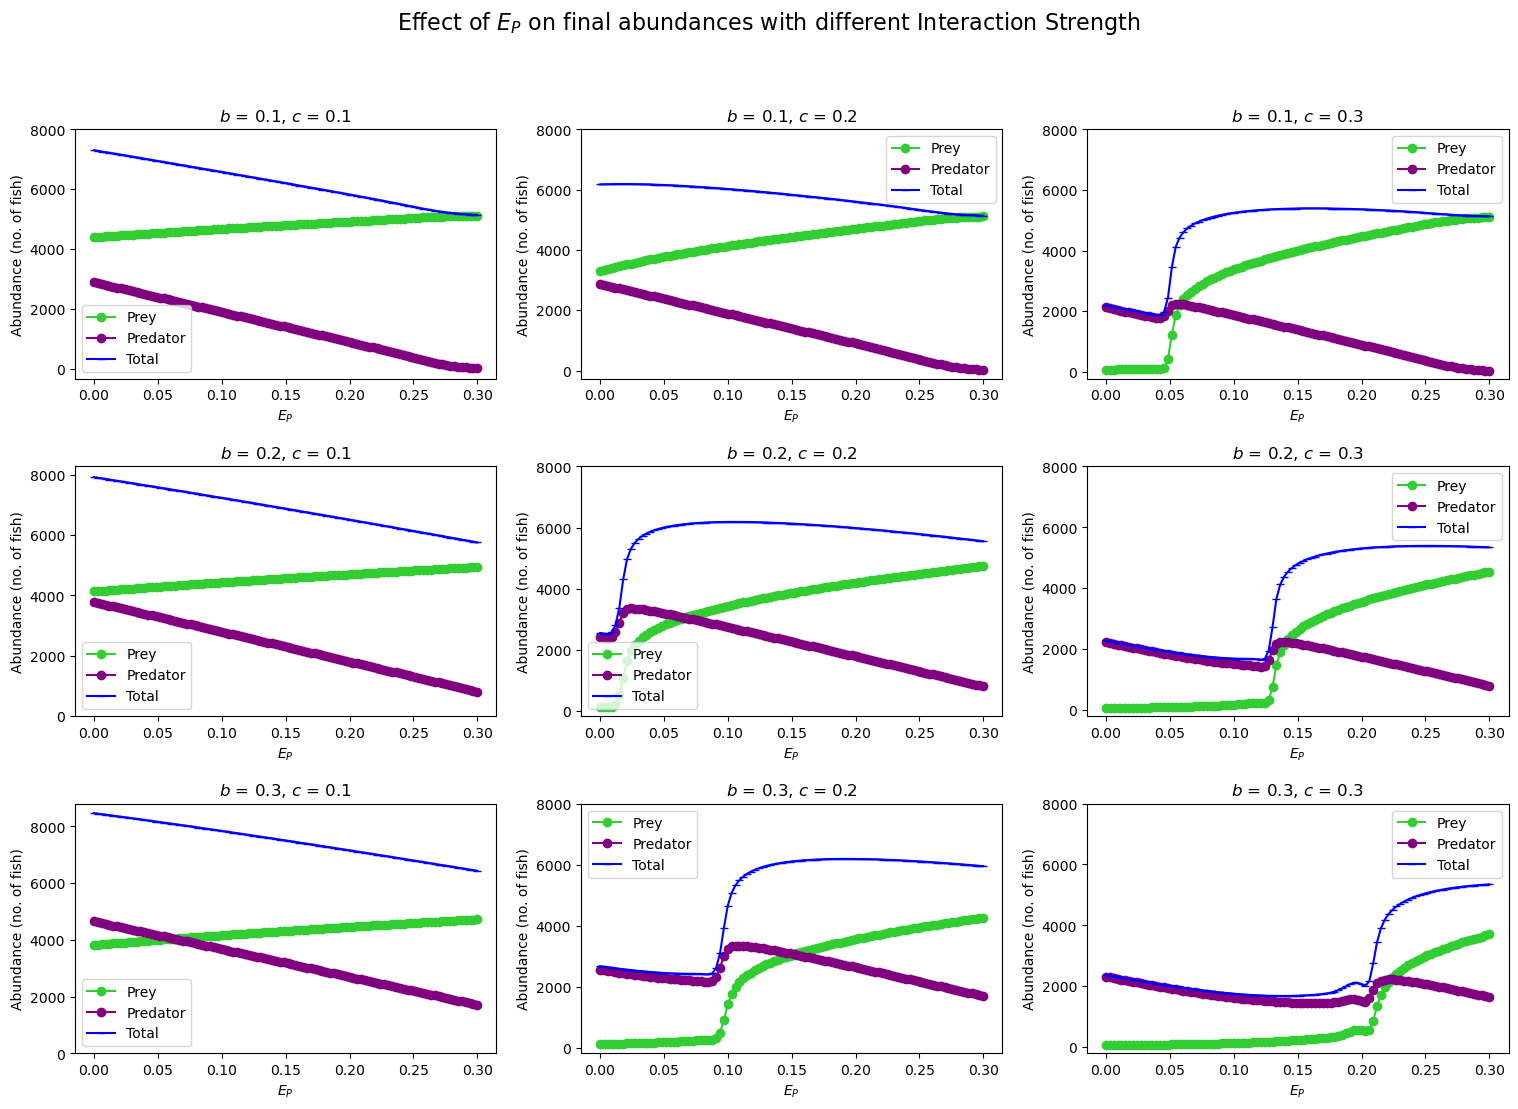

In [36]:
size = 100
E_P_array = np.linspace(0, 0.3, size)
H_final_array = np.zeros(size)
P_final_array = np.zeros(size)
H_harvest_final_array = np.zeros(size)
P_harvest_final_array = np.zeros(size)
b_values = [0.1, 0.2, 0.3]
c_values = [0.1, 0.2, 0.3]

# Y-axes Values 
my_yticks = [0, 2000, 4000, 6000, 8000]

#Initial conditions:
H0 = 1000 
P0 = 100

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(18.5, 12))

# Loop through each combination of b and c values
for i in range(3):
    for j in range(3):
        # Update the b and c values in the parameter dictionary
        parameters_dict['b'] = b_values[i]
        parameters_dict['c'] = c_values[j]

        # Loop through each value of E_P and run the model
        for k, E_P in enumerate(E_P_array):
            parameters_dict['E_P'] = E_P
            H_array, P_array, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
            H_final_array[k] = np.mean(H_array[-25:-1])
            P_final_array[k] = np.mean(P_array[-25:-1])
            H_harvest_final_array[k] = np.mean(H_harvest_array[-25:-1])
            P_harvest_final_array[k] = np.mean(P_harvest_array[-25:-1])
            # Add to get total abundance
            T_final_array = np.add(H_final_array, P_final_array)
        
        # Plot H_final_array vs E_P_array in the corresponding subplot
        axs[i,j].plot(E_P_array, H_final_array, color="limegreen", marker='o', label='Prey')
        axs[i,j].plot(E_P_array, P_final_array, color="purple", marker='o', label='Predator')
        axs[i,j].plot(E_P_array, T_final_array, color="blue", marker='_', label='Total')
        axs[i,j].set_title(f'$b$ = {b_values[i]}, $c$ = {c_values[j]}')
        axs[i,j].set_xlabel('$E_P$')
        axs[i,j].set_ylabel('Abundance (no. of fish)')
        axs[i,j].set_yticks(my_yticks)
        axs[i,j].legend()

# Add a common title to the figure
fig.suptitle('Effect of $E_P$ on final abundances with different Interaction Strength', fontsize=16)
plt.subplots_adjust(wspace=0.2, hspace=0.35)

plt.savefig("manuscript_figs/pred_fishing.jpg",
            format='jpeg',
            dpi=300,
            bbox_inches='tight')

plt.show()

### For-Loop to look at Prey Fishing (Abundance)

In [12]:
#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.2 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.3 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

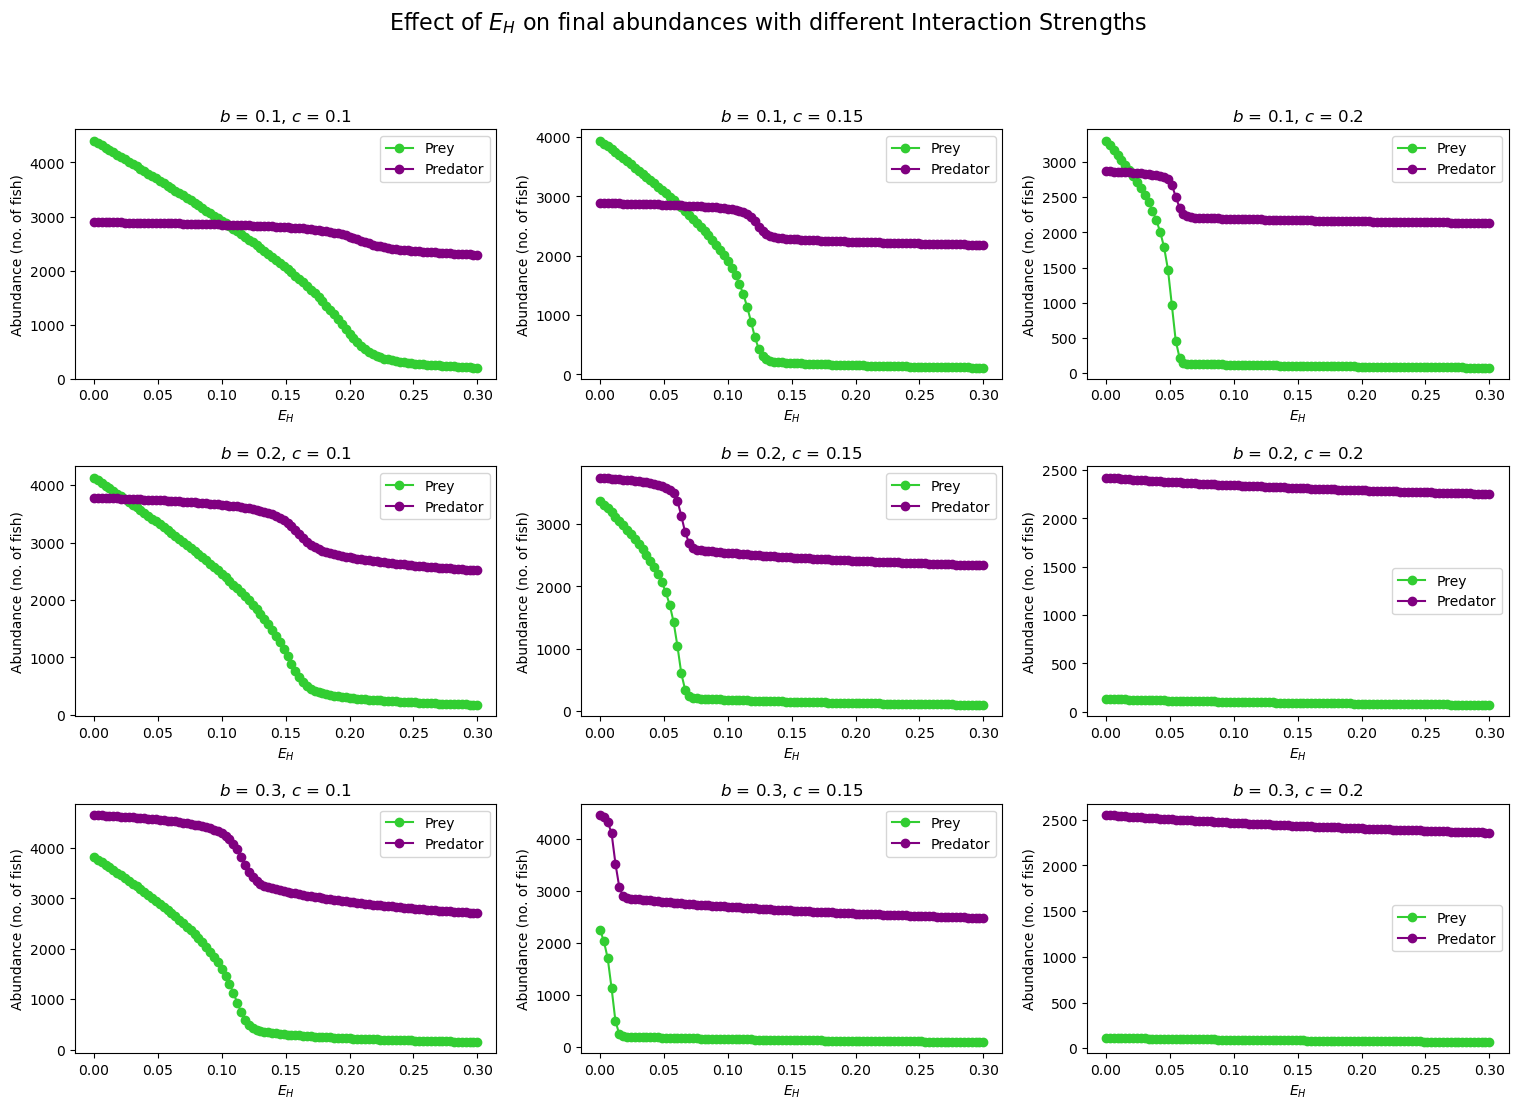

In [13]:
size = 100
E_H_array = np.linspace(0, 0.3, size)
H_final_array = np.zeros(size)
P_final_array = np.zeros(size)
H_harvest_final_array = np.zeros(size)
P_harvest_final_array = np.zeros(size)
b_values = [0.1, 0.2, 0.3]
c_values = [0.1, 0.15, 0.2]

#Initial conditions:
H0 = 1000 
P0 = 100

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(18.5, 12))

# Loop through each combination of b and c values
for i in range(3):
    for j in range(3):
        # Update the b and c values in the parameter dictionary
        parameters_dict['b'] = b_values[i]
        parameters_dict['c'] = c_values[j]

        # Loop through each value of E_H and run the model
        for k, E_H in enumerate(E_H_array):
            parameters_dict['E_H'] = E_H
            H_array, P_array, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
            H_final_array[k] = np.mean(H_array[-25:-1])
            P_final_array[k] = np.mean(P_array[-25:-1])
            H_harvest_final_array[k] = np.mean(H_harvest_array[-25:-1])
            P_harvest_final_array[k] = np.mean(P_harvest_array[-25:-1])
        
        # Plot H_final_array vs E_P_array in the corresponding subplot
        axs[i,j].plot(E_H_array, H_final_array, color="limegreen", marker='o', label='Prey')
        axs[i,j].plot(E_H_array, P_final_array, color="purple", marker='o', label='Predator')
        axs[i,j].set_title(f'$b$ = {b_values[i]}, $c$ = {c_values[j]}')
        axs[i,j].set_xlabel('$E_H$')
        axs[i,j].set_ylabel('Abundance (no. of fish)')
        axs[i,j].legend()

# Add a common title to the figure
fig.suptitle('Effect of $E_H$ on final abundances with different Interaction Strengths', fontsize=16)
plt.subplots_adjust(wspace=0.2, hspace=0.35)

plt.savefig("manuscript_figs/herb_fishing.jpg",
            format='jpeg',
            dpi=300,
            bbox_inches='tight')
plt.show()

## Harvest Figures

### Predator Harvest

In [14]:
#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.2 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.1 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.3 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.1 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

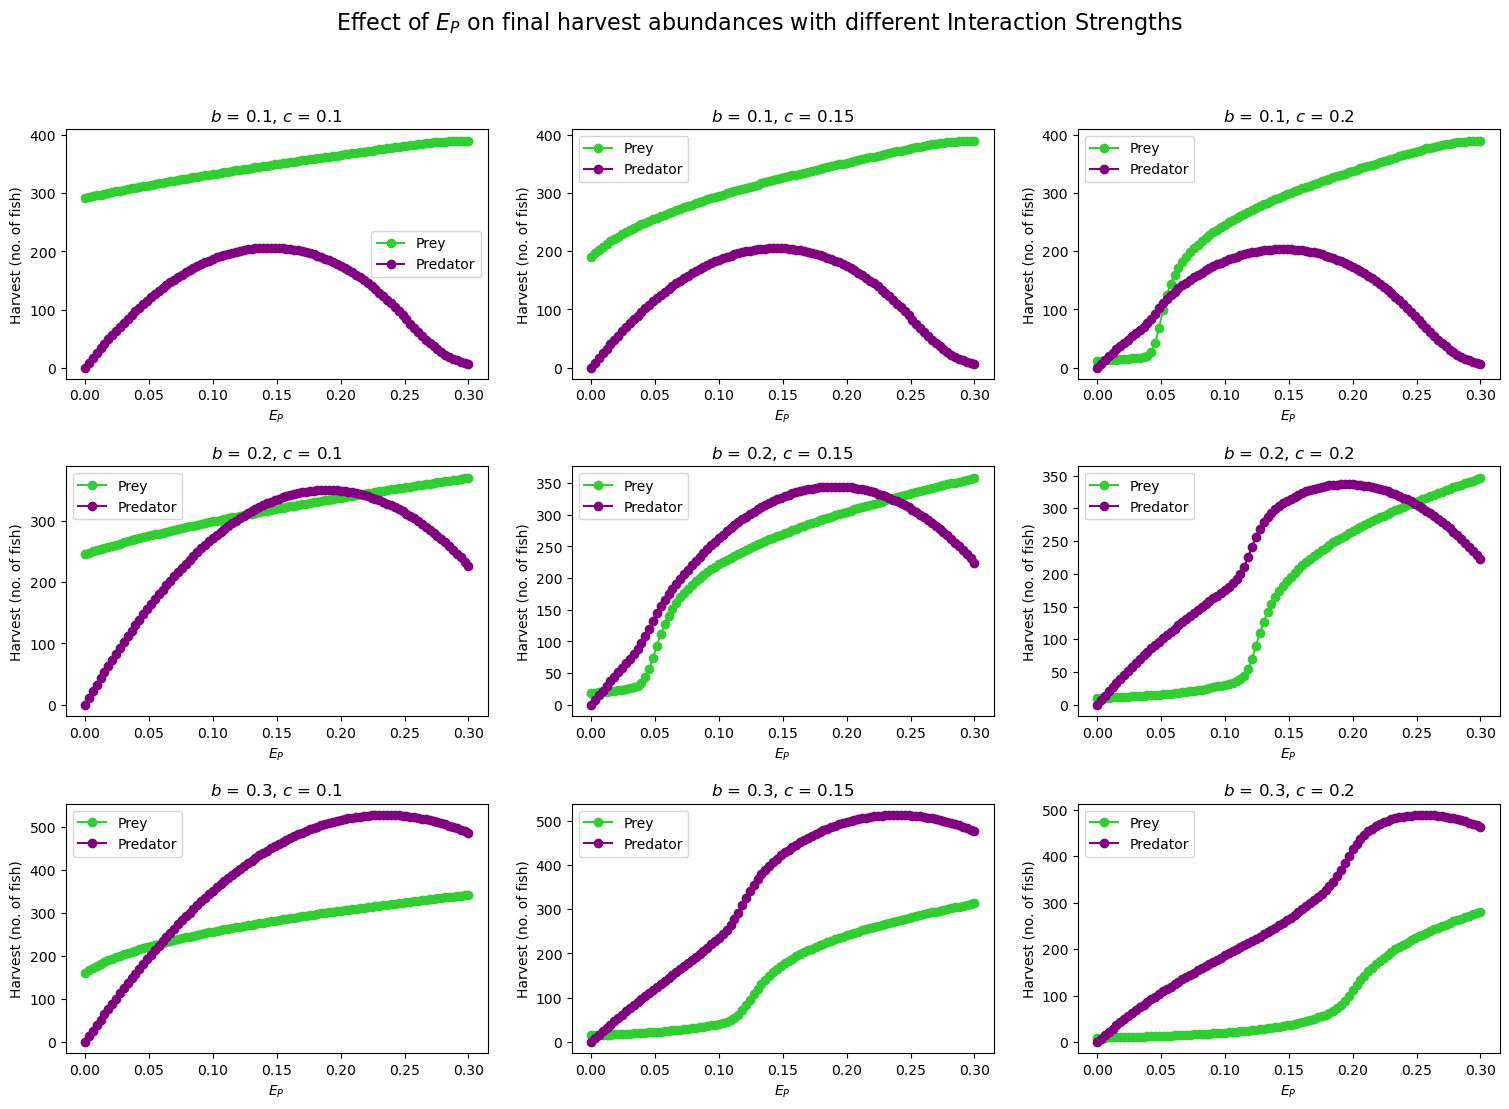

In [15]:
size = 100
E_P_array = np.linspace(0, 0.3, size)
H_final_array = np.zeros(size)
P_final_array = np.zeros(size)
H_harvest_final_array = np.zeros(size)
P_harvest_final_array = np.zeros(size)
b_values = [0.1, 0.2, 0.3]
c_values = [0.1, 0.15, 0.2]

#Initial conditions:
H0 = 1000 
P0 = 100

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(18.5, 12))

# Loop through each combination of b and c values
for i in range(3):
    for j in range(3):
        # Update the b and c values in the parameter dictionary
        parameters_dict['b'] = b_values[i]
        parameters_dict['c'] = c_values[j]

        # Loop through each value of E_H and run the model
        for k, E_P in enumerate(E_P_array):
            parameters_dict['E_P'] = E_P
            H_array, P_array, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
            H_final_array[k] = np.mean(H_array[-25:-1])
            P_final_array[k] = np.mean(P_array[-25:-1])
            H_harvest_final_array[k] = np.mean(H_harvest_array[-25:-1])
            P_harvest_final_array[k] = np.mean(P_harvest_array[-25:-1])
        
        # Plot H_final_array vs E_P_array in the corresponding subplot
        axs[i,j].plot(E_P_array, H_harvest_final_array, color="limegreen", marker='o', label='Prey')
        axs[i,j].plot(E_P_array, P_harvest_final_array, color="purple", marker='o', label='Predator')
        axs[i,j].set_title(f'$b$ = {b_values[i]}, $c$ = {c_values[j]}')
        axs[i,j].set_xlabel('$E_P$')
        axs[i,j].set_ylabel('Harvest (no. of fish)')
        axs[i,j].legend()

# Add a common title to the figure
fig.suptitle('Effect of $E_P$ on final harvest abundances with different Interaction Strengths', fontsize=16)
plt.subplots_adjust(wspace=0.2, hspace=0.35)

plt.savefig("manuscript_figs/pred_harvest.jpg",
            format='jpeg',
            dpi=300,
            bbox_inches='tight')

plt.show()

## Max harvest and abundance 

In [87]:
#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.2 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.1 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.3 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.1 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

In [88]:
#Define params, include harvest maxes for each combination of b and c
size = 100
E_P_array = np.linspace(0, 0.3, size)
H_final_array = np.zeros(size)
P_final_array = np.zeros(size)
H_harvest_final_array = np.zeros(size)
P_harvest_final_array = np.zeros(size)
b_values = [0.1, 0.2, 0.3]
c_values = [0.1, 0.2, 0.3]
H_abundance_maxes = np.zeros((3,3))
P_abundance_maxes = np.zeros((3,3))
H_harvest_maxes = np.zeros((3,3))
P_harvest_maxes = np.zeros((3,3))

# Initial conditions:
H0 = 1000 
P0 = 100

# Loop through each combination of b and c values
for i in range(3):
    for j in range(3):
        # Update the b and c values in the parameter dictionary
        parameters_dict['b'] = b_values[i]
        parameters_dict['c'] = c_values[j]

        # Loop through each value of E_P and run the model
        for k, E_P in enumerate(E_P_array):
            parameters_dict['E_P'] = E_P
            H_array, P_array, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
            H_final_array[k] = np.mean(H_array[-25:-1])
            P_final_array[k] = np.mean(P_array[-25:-1])
            H_harvest_final_array[k] = np.mean(H_harvest_array[-25:-1])
            P_harvest_final_array[k] = np.mean(P_harvest_array[-25:-1])

        # Calculate the maximum harvest values for predators and herbivores at each combination
        H_abundance_maxes[i, j] = np.max(H_final_array)
        P_abundance_maxes[i, j] = np.max(P_final_array) 
        H_harvest_maxes[i, j] = np.max(H_harvest_final_array)
        P_harvest_maxes[i, j] = np.max(P_harvest_final_array)
        
        
        
# Create a df with the max harvest values, b values, and c values
data = {'b': b_values * len(c_values),
        'c': np.repeat(c_values, len(b_values)),
        'H_harvest_max': H_harvest_maxes.flatten(),
        'P_harvest_max': P_harvest_maxes.flatten(),
        'H_abundance_max': H_abundance_maxes.flatten(), 
        'P_abundance_max': P_abundance_maxes.flatten()}

df = pd.DataFrame(data)

df['total_harvest_max'] = df['H_harvest_max'] + df['P_harvest_max']
df['total_abundance_max'] = df['H_abundance_max'] + df['P_abundance_max']

print(df)

     b    c  H_harvest_max  P_harvest_max  H_abundance_max  P_abundance_max  \
0  0.1  0.1     390.344676     206.526026      3903.446759      2853.855075   
1  0.2  0.1     389.706263     203.685571      3897.062629      2193.294251   
2  0.3  0.1     389.070120     197.530464      3890.701198      2107.106662   
3  0.1  0.2     369.522807     349.484403      3695.228073      3661.726329   
4  0.2  0.2     346.513699     336.760964      3465.136991      2341.960831   
5  0.3  0.2     321.623286     306.053815      3216.232863      2201.552825   
6  0.1  0.3     341.687776     527.090307      3416.877760      4289.349829   
7  0.2  0.3     280.287263     489.035571      2802.872628      2468.311943   
8  0.3  0.3     194.225167     415.626419      1942.251667      2287.036999   

   total_harvest_max  total_abundance_max  
0         596.870702          6757.301834  
1         593.391834          6090.356879  
2         586.600584          5997.807861  
3         719.007210          735

In [89]:
#Define params, include harvest maxes for each combination of b and c
size = 100
E_P_array = np.linspace(0, 0.3, size)
H_final_array = np.zeros(size)
P_final_array = np.zeros(size)
H_harvest_final_array = np.zeros(size)
P_harvest_final_array = np.zeros(size)
b_values = [0.1, 0.2, 0.3]
c_values = [0.1, 0.2, 0.3]
H_abundance_maxes = np.zeros((3,3))
P_abundance_maxes = np.zeros((3,3))
H_harvest_maxes = np.zeros((3, 3))
P_harvest_maxes = np.zeros((3, 3))

# Initial conditions:
H0 = 1000 
P0 = 100

# Loop through each combination of b and c values
for i in range(3):
    for j in range(3):
        # Update the b and c values in the parameter dictionary
        parameters_dict['b'] = b_values[i]
        parameters_dict['c'] = c_values[j]

        # Loop through each value of E_P and run the model
        for k, E_P in enumerate(E_P_array):
            parameters_dict['E_P'] = E_P
            H_array, P_array, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
            H_final_array[k] = np.mean(H_array[-25:-1])
            P_final_array[k] = np.mean(P_array[-25:-1])
            H_harvest_final_array[k] = np.mean(H_harvest_array[-25:-1])
            P_harvest_final_array[k] = np.mean(P_harvest_array[-25:-1])

        # Calculate the maximum harvest values for predators and herbivores at each combination
        H_abundance_maxes[i, j] = np.max(H_final_array)
        P_abundance_maxes[i, j] = np.max(P_final_array) 
        H_harvest_maxes[i, j] = np.max(H_harvest_final_array)
        P_harvest_maxes[i, j] = np.max(P_harvest_final_array)
        
        
        
# Create a df with the max harvest values, b values, and c values
data = {'c': c_values * len(b_values),
        'b': np.repeat(b_values, len(c_values)),
        'H_harvest_max': H_harvest_maxes.flatten(),
        'P_harvest_max': P_harvest_maxes.flatten(),
        'H_abundance_max': H_abundance_maxes.flatten(), 
        'P_abundance_max': P_abundance_maxes.flatten()}

df = pd.DataFrame(data)

df['total_harvest_max'] = df['H_harvest_max'] + df['P_harvest_max']
df['total_abundance_max'] = df['H_abundance_max'] + df['P_abundance_max']

print(df)

     c    b  H_harvest_max  P_harvest_max  H_abundance_max  P_abundance_max  \
0  0.1  0.1     390.344676     206.526026      3903.446759      2853.855075   
1  0.2  0.1     389.706263     203.685571      3897.062629      2193.294251   
2  0.3  0.1     389.070120     197.530464      3890.701198      2107.106662   
3  0.1  0.2     369.522807     349.484403      3695.228073      3661.726329   
4  0.2  0.2     346.513699     336.760964      3465.136991      2341.960831   
5  0.3  0.2     321.623286     306.053815      3216.232863      2201.552825   
6  0.1  0.3     341.687776     527.090307      3416.877760      4289.349829   
7  0.2  0.3     280.287263     489.035571      2802.872628      2468.311943   
8  0.3  0.3     194.225167     415.626419      1942.251667      2287.036999   

   total_harvest_max  total_abundance_max  
0         596.870702          6757.301834  
1         593.391834          6090.356879  
2         586.600584          5997.807861  
3         719.007210          735

### combined plots

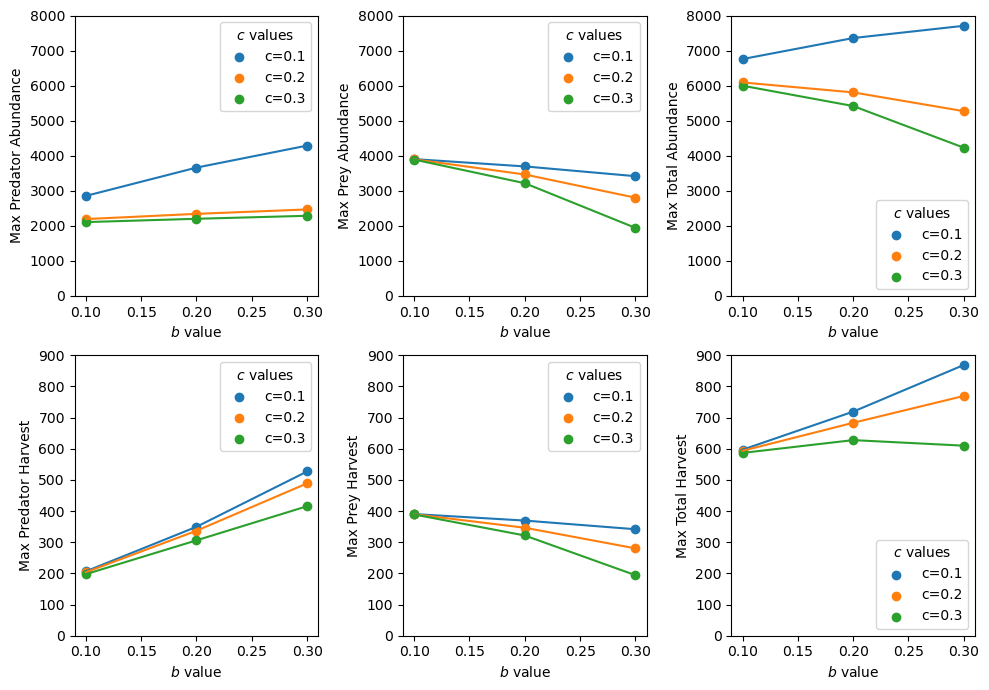

In [90]:
# Set up the figure with six subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
#fig.suptitle('Maximum Harvest Levels Across Coupling', fontsize=14)
#fig.tight_layout(rect=[0.1, 0.03, 1.1, 0.95])

# Iterate over unique c values
unique_c_values = df['c'].unique()
for c_value in unique_c_values:
    # Filter the DataFrame for the current c value
    filtered_df = df[df['c'] == c_value]

    # Scatter plot for P_abundance_max
    ax1.scatter(filtered_df['b'], filtered_df['P_abundance_max'], label=f'c={c_value}', marker = 'o')
    ax1.plot(filtered_df['b'], filtered_df['P_abundance_max'])
    ax1.set_ylim(0,8000)
    ax1.set_xlabel("$b$ value")
    ax1.set_ylabel("Max Predator Abundance")
    ax1.legend(title='$c$ values', loc='upper right')

    # Scatter plot for H_abundance_max
    ax2.scatter(filtered_df['b'], filtered_df['H_abundance_max'], label=f'c={c_value}', marker = 'o')
    ax2.plot(filtered_df['b'], filtered_df['H_abundance_max'])
    ax2.set_ylim(0,8000)
    ax2.set_xlabel("$b$ value")
    ax2.set_ylabel("Max Prey Abundance")
    ax2.legend(title='$c$ values', loc='upper right')
    
    # Scatter plot for total_abundance_max
    ax3.scatter(filtered_df['b'], filtered_df['total_abundance_max'], label=f'c={c_value}', marker = 'o')
    ax3.plot(filtered_df['b'], filtered_df['total_abundance_max'])
    ax3.set_ylim(0,8000)
    ax3.set_xlabel("$b$ value")
    ax3.set_ylabel("Max Total Abundance")
    ax3.legend(title='$c$ values', loc='lower right')
    
    # Scatter plot for P_harvest_max
    ax4.scatter(filtered_df['b'], filtered_df['P_harvest_max'], label=f'c={c_value}', marker = 'o')
    ax4.plot(filtered_df['b'], filtered_df['P_harvest_max'])
    ax4.set_ylim(0,900)
    ax4.set_xlabel("$b$ value")
    ax4.set_ylabel("Max Predator Harvest")
    ax4.legend(title='$c$ values', loc='upper right')

    # Scatter plot for H_harvest_max
    ax5.scatter(filtered_df['b'], filtered_df['H_harvest_max'], label=f'c={c_value}', marker = 'o')
    ax5.plot(filtered_df['b'], filtered_df['H_harvest_max'])
    ax5.set_ylim(0,900)
    ax5.set_xlabel("$b$ value")
    ax5.set_ylabel("Max Prey Harvest")
    ax5.legend(title='$c$ values', loc='upper right')
    
    # Scatter plot for total_harvest_max
    ax6.scatter(filtered_df['b'], filtered_df['total_harvest_max'], label=f'c={c_value}', marker = 'o')
    ax6.plot(filtered_df['b'], filtered_df['total_harvest_max'])
    ax6.set_ylim(0,900)
    ax6.set_xlabel("$b$ value")
    ax6.set_ylabel("Max Total Harvest")
    ax6.legend(title='$c$ values', loc='lower right')


# Display the plots
#fig.suptitle('Time Series Varied $b$ and $c$ Values', fontsize=16)
fig.set_size_inches(10, 7)
plt.tight_layout()

plt.savefig("manuscript_figs/bc_param_space.jpg",
            format='jpeg',
            dpi=300,
            bbox_inches='tight')

plt.show()

### Herbivore Harvest 

In [91]:
#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.2 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.1 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.3 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.1 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

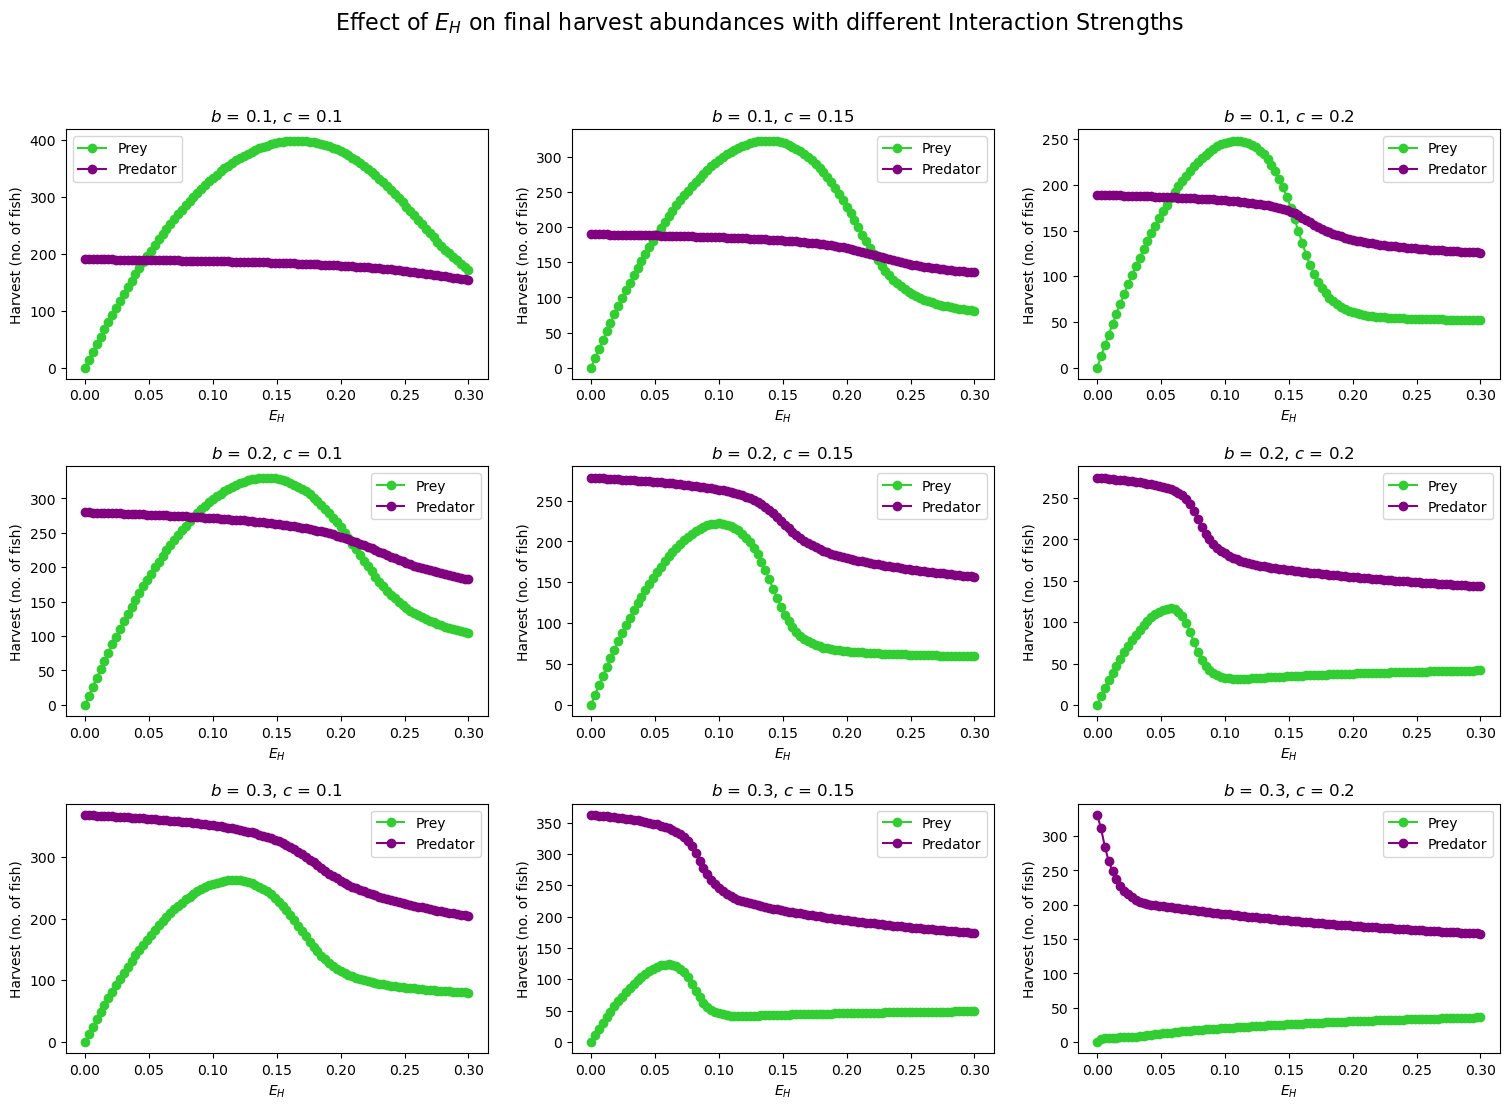

In [92]:
size = 100
E_H_array = np.linspace(0, 0.3, size)
H_final_array = np.zeros(size)
P_final_array = np.zeros(size)
H_harvest_final_array = np.zeros(size)
P_harvest_final_array = np.zeros(size)
b_values = [0.1, 0.2, 0.3]
c_values = [0.1, 0.15, 0.2]

#Initial conditions:
H0 = 1000 
P0 = 100

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(18.5, 12))

# Loop through each combination of b and c values
for i in range(3):
    for j in range(3):
        # Update the b and c values in the parameter dictionary
        parameters_dict['b'] = b_values[i]
        parameters_dict['c'] = c_values[j]

        # Loop through each value of E_H and run the model
        for k, E_H in enumerate(E_H_array):
            parameters_dict['E_H'] = E_H
            H_array, P_array, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
            H_final_array[k] = np.mean(H_array[-50:-1])
            P_final_array[k] = np.mean(P_array[-50:-1])
            H_harvest_final_array[k] = np.mean(H_harvest_array[-50:-1])
            P_harvest_final_array[k] = np.mean(P_harvest_array[-50:-1])
        
        # Plot H_final_array vs E_P_array in the corresponding subplot
        axs[i,j].plot(E_H_array, H_harvest_final_array, color="limegreen", marker='o', label='Prey')
        axs[i,j].plot(E_H_array, P_harvest_final_array, color="purple", marker='o', label='Predator')
        axs[i,j].set_title(f'$b$ = {b_values[i]}, $c$ = {c_values[j]}')
        axs[i,j].set_xlabel('$E_H$')
        axs[i,j].set_ylabel('Harvest (no. of fish)')
        axs[i,j].legend()

# Add a common title to the figure
fig.suptitle('Effect of $E_H$ on final harvest abundances with different Interaction Strengths', fontsize=16)
plt.subplots_adjust(wspace=0.2, hspace=0.35)
plt.show()

### Function to Split Axes - If Needed

In [93]:
def two_scales(ax1, E_P_array, data1, data2, c1, c2, m1, m2):
    ax2 = ax1.twinx()
    ax1.plot(E_P_array, data1, color=c1, marker=m1)
    ax1.set_xlabel('Predator Harvesting Effort')
    ax1.set_ylabel('Prey Abundance')
    ax2.plot(E_P_array, data2, color=c2, marker=m2)
    ax2.set_ylabel('Predator Abundance')
    return ax1, ax2

# Fishing Heatmaps

In [62]:
#Run model simulation

numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.5 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.3 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.3 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.3 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

H0 = 1000
P0 = 100

H_array, P_array, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)

In [63]:
size = 50
heatmap_H = np.zeros((size, size))
heatmap_P = np.zeros((size, size))
heatmap_T = np.zeros((size, size))
E_H_array = np.linspace(0, 1.0, size)
E_P_array = np.linspace(0, 1.0, size)

#Loop through E_P and E_H values from 0-1 
for i in np.arange(0, size):
    for j in np.arange(0, size):
        E_H = E_H_array[i]
        E_P = E_P_array[j] 
        parameters_dict['E_H'] = E_H 
        parameters_dict['E_P'] = E_P
        H_array, P_array, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
        H_last = np.mean(H_array[-25:-1])
        P_last = np.mean(P_array[-25:-1])
        T_last = np.mean(np.add(H_array[-25:-1], P_array[-25:-1]))
        heatmap_T[i,j] = T_last
        heatmap_H[i,j] = H_last
        heatmap_P[i,j] = P_last
        j+=1
    i+=1

### 3 Panel Figure - Fishing Distribution

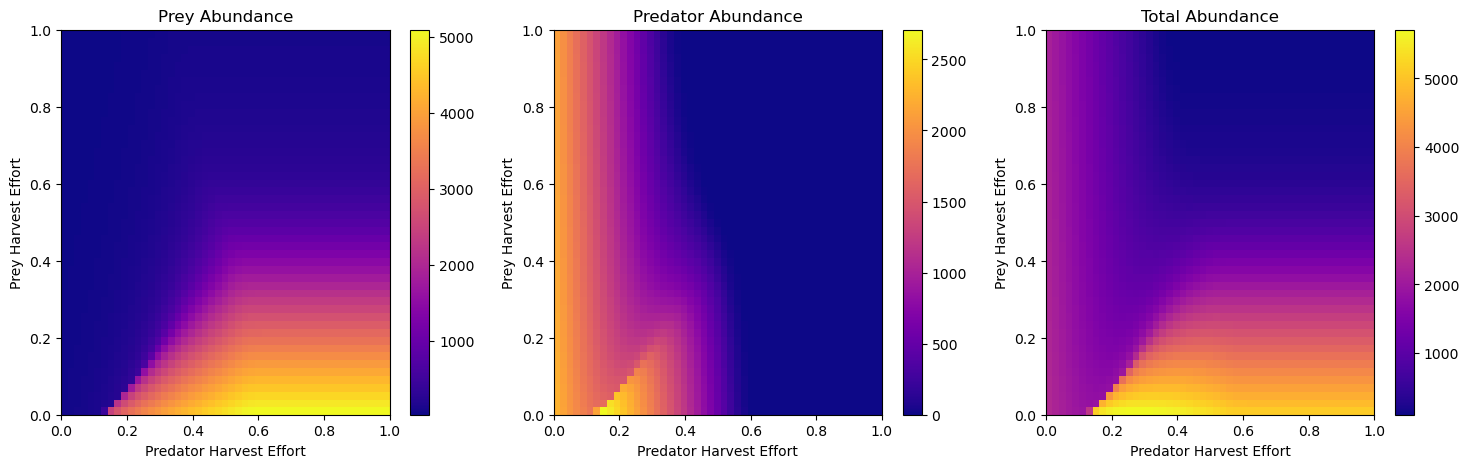

In [64]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize = (18,5))

im = ax0.pcolormesh(E_P_array, E_H_array, heatmap_H, cmap=plt.cm.get_cmap('plasma'),shading='auto')
fig.colorbar(im, ax=ax0, orientation="vertical", pad = 0.05)
ax0.set_title(label="Prey Abundance")
ax0.set_ylabel("Prey Harvest Effort")
ax0.set_xlabel("Predator Harvest Effort")

im = ax1.pcolormesh(E_P_array, E_H_array, heatmap_P, cmap=plt.cm.get_cmap('plasma'),shading='auto')
fig.colorbar(im, ax=ax1, orientation="vertical", pad = 0.05)
ax1.set_title(label="Predator Abundance")
ax1.set_ylabel("Prey Harvest Effort")
ax1.set_xlabel("Predator Harvest Effort")

im = ax2.pcolormesh(E_H_array, E_P_array, heatmap_T, cmap=plt.cm.get_cmap('plasma'),shading='auto')
fig.colorbar(im, ax=ax2, orientation= "vertical", pad = 0.05)
ax2.set_title(label="Total Abundance")
ax2.set_ylabel("Prey Harvest Effort")
ax2.set_xlabel("Predator Harvest Effort")


plt.savefig("manuscript_figs/abundance_heatmaps.jpg",
            format='jpeg',
            dpi=300,
            bbox_inches='tight')


# B & C Exploration - Heat Maps

### Prey Abundance

In [25]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

H0 = 1000
P0 = 100

H_array, P_array, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)

In [26]:
size = 50
heatmap_H = np.zeros((size, size))
heatmap_P = np.zeros((size, size))
b_array = np.linspace(0, 0.3, size)
c_array = np.linspace(0, 0.3, size)


for i in np.arange(0, size):
    for j in np.arange(0, size):
        b = b_array[i]
        c = c_array[j] 
        parameters_dict['b'] = b 
        parameters_dict['c'] = c
        H_array, P_array, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
        H_last = np.mean(H_array[-10:-1])
        P_last = np.mean(P_array[-10:-1])
        heatmap_H[i,j] = H_last
        heatmap_P[i,j] = P_last
        j+=1
    i+=1

Text(0.5, 1.0, 'Prey Abundance Heatmap')

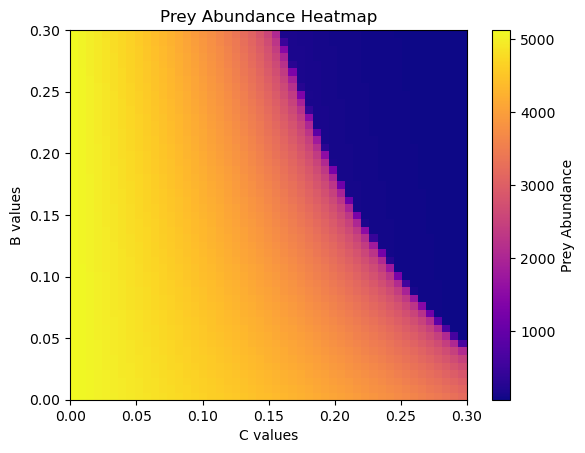

In [27]:
plt.pcolormesh(c_array, b_array, heatmap_H, cmap=plt.cm.get_cmap('plasma'),shading='auto')
plt.colorbar(label="Prey Abundance")
plt.xlabel("C values")
plt.ylabel("B values")
plt.title("Prey Abundance Heatmap")

### Predator Abundance

Text(0.5, 1.0, 'Predator Abundance Heatmap')

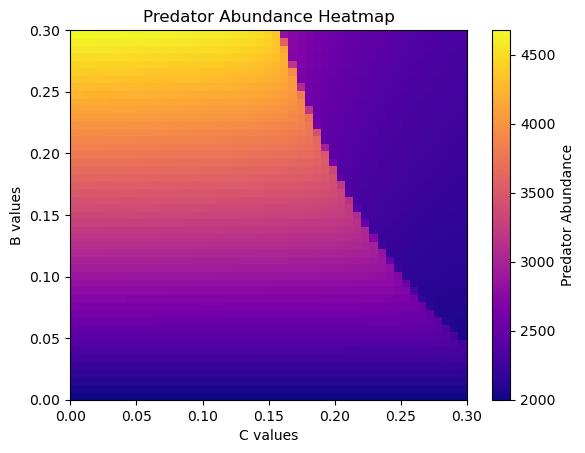

In [28]:
plt.pcolormesh(c_array, b_array, heatmap_P, cmap=plt.cm.get_cmap('plasma'),shading='auto')
plt.colorbar(label="Predator Abundance")
plt.xlabel("C values")
plt.ylabel("B values")
plt.title("Predator Abundance Heatmap")

### Total Abundance of System

In [29]:
size = 50
heatmap_T = np.zeros((size, size))
b_array = np.linspace(0, 0.3, size)
c_array = np.linspace(0, 0.3, size)

for i in np.arange(0, size):
    for j in np.arange(0, size):
        b = b_array[i]
        c = c_array[j] 
        parameters_dict['b'] = b 
        parameters_dict['c'] = c
        H_array, P_array, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
        T_last = np.mean(np.add(H_array[-10:-1], P_array[-10:-1]))
        heatmap_T[i,j] = T_last
        j+=1
    i+=1
    

Text(0.5, 1.0, 'Predator + Prey Abundance Heatmap')

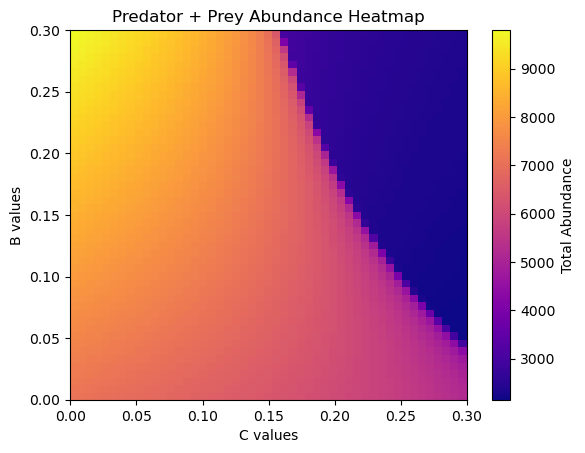

In [30]:
plt.pcolormesh(c_array, b_array, heatmap_T, cmap=plt.cm.get_cmap('plasma'),shading='auto')
plt.colorbar(label="Total Abundance")
plt.xlabel("C values")
plt.ylabel("B values")
plt.title("Predator + Prey Abundance Heatmap")
#plt.savefig("ICRS_figures/Heatmap_total.jpg",
            #format='jpeg',
            #dpi=300,
            #bbox_inches='tight')

## 3 Panel Figure - b and c variables

Text(0.5, 0, '$c$ Values')

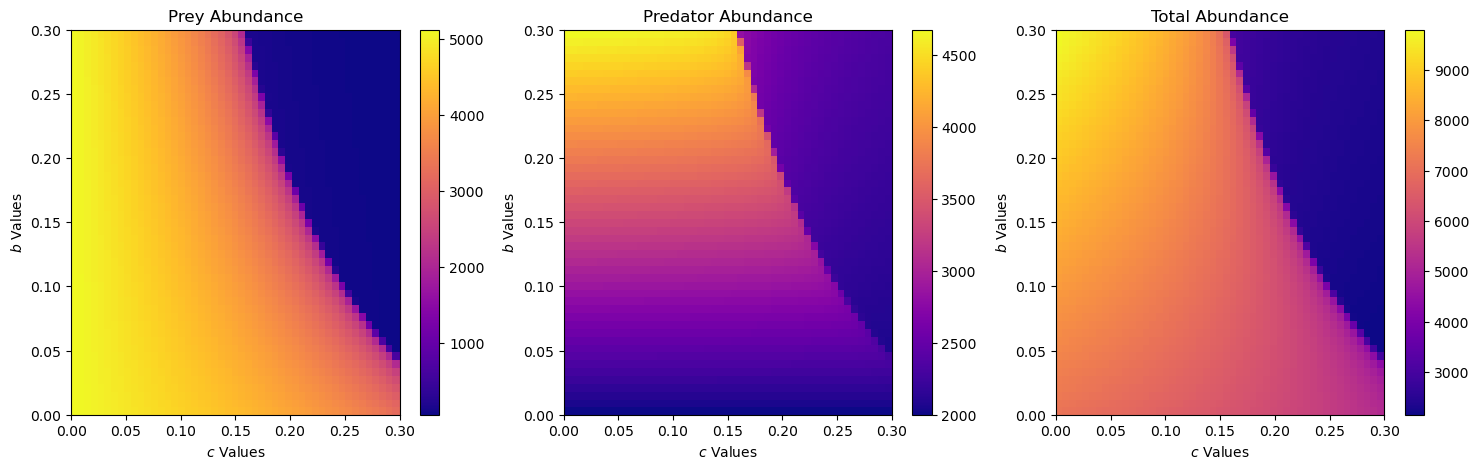

In [31]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize = (18,5))

im = ax0.pcolormesh(c_array, b_array, heatmap_H, cmap=plt.cm.get_cmap('plasma'),shading='auto')
fig.colorbar(im, ax=ax0, orientation="vertical", pad = 0.05)
ax0.set_title(label="Prey Abundance")
ax0.set_ylabel("$b$ Values")
ax0.set_xlabel("$c$ Values")

im = ax1.pcolormesh(c_array, b_array, heatmap_P, cmap=plt.cm.get_cmap('plasma'),shading='auto')
fig.colorbar(im, ax=ax1, orientation="vertical", pad = 0.05)
ax1.set_title(label="Predator Abundance")
ax1.set_ylabel("$b$ Values")
ax1.set_xlabel("$c$ Values")

im = ax2.pcolormesh(c_array, b_array, heatmap_T, cmap=plt.cm.get_cmap('plasma'),shading='auto')
fig.colorbar(im, ax=ax2, orientation= "vertical", pad = 0.05)
ax2.set_title(label="Total Abundance")
ax2.set_ylabel("$b$ Values")
ax2.set_xlabel("$c$ Values")

#plt.savefig("ICRS_figures/three_panel_fishing_heatmap.jpg",
            #format='jpeg',
            #dpi=300,
            #bbox_inches='tight')

# Growth Rates

In [73]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.0 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.15 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.0 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.2 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

H0 = 1000
P0 = 100

H_array, P_array, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)

In [74]:
size = 50
heatmap_H = np.zeros((size, size))
heatmap_P = np.zeros((size, size))
r_H_array = np.linspace(0, 0.5, size)
r_P_array = np.linspace(0, 0.5, size)


for i in np.arange(0, size):
    for j in np.arange(0, size):
        r_H = r_H_array[i]
        r_P = r_P_array[j] 
        parameters_dict['r_H'] = r_H 
        parameters_dict['r_P'] = r_P
        H_array, P_array, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
        H_last = np.mean(H_array[-10:-1])
        P_last = np.mean(P_array[-10:-1])
        heatmap_H[i,j] = H_last
        heatmap_P[i,j] = P_last
        j+=1
    i+=1

In [75]:
size = 50
heatmap_T = np.zeros((size, size))
r_H_array = np.linspace(0, 0.5, size)
r_P_array = np.linspace(0, 0.5, size)

for i in np.arange(0, size):
    for j in np.arange(0, size):
        r_H = r_H_array[i]
        r_P = r_P_array[j] 
        parameters_dict['r_H'] = r_H 
        parameters_dict['r_P'] = r_P
        H_array, P_array, H_harvest_array, P_harvest_array = run_model(H0, P0, parameters_dict)
        T_last = np.mean(np.add(H_array[-10:-1], P_array[-10:-1]))
        heatmap_T[i,j] = T_last
        j+=1
    i+=1
    

Text(0.5, 0, '$r_H$ Values')

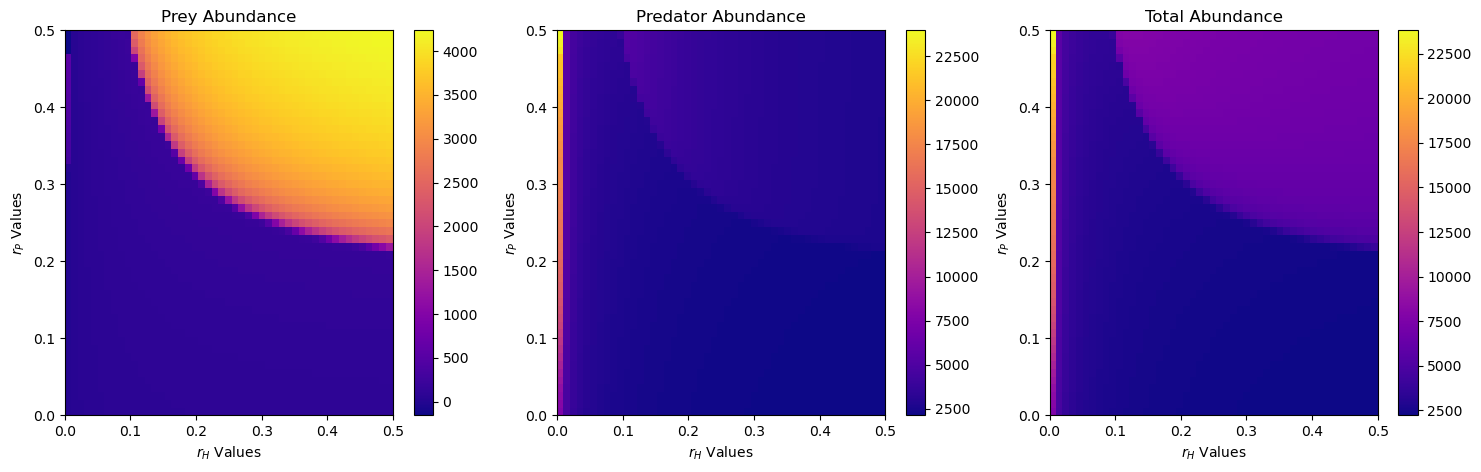

In [76]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize = (18,5))

im = ax0.pcolormesh(r_H_array, r_P_array, heatmap_H, cmap=plt.cm.get_cmap('plasma'),shading='auto')
fig.colorbar(im, ax=ax0, orientation="vertical", pad = 0.05)
ax0.set_title(label="Prey Abundance")
ax0.set_ylabel("$r_P$ Values")
ax0.set_xlabel("$r_H$ Values")

im = ax1.pcolormesh(r_H_array, r_P_array, heatmap_P, cmap=plt.cm.get_cmap('plasma'),shading='auto')
fig.colorbar(im, ax=ax1, orientation="vertical", pad = 0.05)
ax1.set_title(label="Predator Abundance")
ax1.set_ylabel("$r_P$ Values")
ax1.set_xlabel("$r_H$ Values")

im = ax2.pcolormesh(r_H_array, r_P_array, heatmap_T, cmap=plt.cm.get_cmap('plasma'),shading='auto')
fig.colorbar(im, ax=ax2, orientation= "vertical", pad = 0.05)
ax2.set_title(label="Total Abundance")
ax2.set_ylabel("$r_P$ Values")
ax2.set_xlabel("$r_H$ Values")

## MSY Figures? 

In [78]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.1 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.1 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

H0 = 1000
P0 = 100

H_array1, P_array1, H_harvest_array1, P_harvest_array1 = run_model(H0, P0, parameters_dict)

In [79]:
size = 100
E_P_array = np.linspace(0,0.3,size)
H_final_array1 = np.zeros(size)
P_final_array1 = np.zeros(size)
H_harvest_final_array1 = np.zeros(size)
P_harvest_final_array1 = np.zeros(size)

#Initial conditions:
H0 = 1000 
P0 = 100

for i,E_P in enumerate(E_P_array):
    parameters_dict['E_P'] = E_P
    H_array1, P_array1, H_harvest_array1, P_harvest_array1 = run_model(H0, P0, parameters_dict)
    H_final_array1[i] = np.mean(H_array1[-200:-1])
    P_final_array1[i] = np.mean(P_array1[-200:-1])
    H_harvest_final_array1[i] = np.mean(H_harvest_array1[-200:-1])
    P_harvest_final_array1[i] = np.mean(P_harvest_array1[-200:-1])

In [80]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.2 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.1 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

H0 = 1000
P0 = 100

H_array2, P_array2, H_harvest_array2, P_harvest_array2 = run_model(H0, P0, parameters_dict)

In [81]:
size = 100
E_P_array = np.linspace(0,0.3,size)
H_final_array2 = np.zeros(size)
P_final_array2 = np.zeros(size)
H_harvest_final_array2 = np.zeros(size)
P_harvest_final_array2 = np.zeros(size)

#Initial conditions:
H0 = 1000 
P0 = 100

for i,E_P in enumerate(E_P_array):
    parameters_dict['E_P'] = E_P
    H_array2, P_array2, H_harvest_array2, P_harvest_array2 = run_model(H0, P0, parameters_dict)
    H_final_array2[i] = np.mean(H_array2[-200:-1])
    P_final_array2[i] = np.mean(P_array2[-200:-1])
    H_harvest_final_array2[i] = np.mean(H_harvest_array2[-200:-1])
    P_harvest_final_array2[i] = np.mean(P_harvest_array2[-200:-1])

In [82]:
numyears = 100 # number of years to run simulation 

#Herbivore parameters:
r_H = 0.4 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.3 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.1 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest

parameters_dict = {'numyears': numyears, 
                  'r_H': r_H, 
                  'K_H': K_H, 
                  'theta_H': theta_H,
                  'c': c, 
                  'd': d, 
                  'E_H': E_H,
                  'q_H': q_H, 
                  'r_P': r_P,
                  'K_P': K_P,
                  'theta_P': theta_P, 
                  'b': b,
                  'q_P': q_P, 
                  'E_P': E_P,
                  }

H0 = 1000
P0 = 100

H_array3, P_array3, H_harvest_array3, P_harvest_array3 = run_model(H0, P0, parameters_dict)

In [83]:
size = 100
E_P_array = np.linspace(0,0.3,size)
H_final_array3 = np.zeros(size)
P_final_array3 = np.zeros(size)
H_harvest_final_array3 = np.zeros(size)
P_harvest_final_array3 = np.zeros(size)

#Initial conditions:
H0 = 1000 
P0 = 100

for i,E_P in enumerate(E_P_array):
    parameters_dict['E_P'] = E_P
    H_array3, P_array3, H_harvest_array3, P_harvest_array3 = run_model(H0, P0, parameters_dict)
    H_final_array3[i] = np.mean(H_array3[-200:-1])
    P_final_array3[i] = np.mean(P_array3[-200:-1])
    H_harvest_final_array3[i] = np.mean(H_harvest_array3[-200:-1])
    P_harvest_final_array3[i] = np.mean(P_harvest_array3[-200:-1])

In [84]:
total_harvest = np.add(H_harvest_final_array1, P_harvest_final_array1)

In [85]:
total_harvest

array([291.24090948, 299.92218866, 308.42013835, 316.73505689,
       324.86723636, 332.81696323, 340.58451896, 348.17018058,
       355.57422125, 362.79691083, 369.83851633, 376.69930245,
       383.37953204, 389.87946659, 396.19936668, 402.33949244,
       408.30010399, 414.08146188, 419.68382756, 425.10746381,
       430.35263519, 435.41960852, 440.30865331, 445.02004225,
       449.55405171, 453.91096224, 458.09105906, 462.09463266,
       465.92197929, 469.57340161, 473.04920929, 476.34971965,
       479.47525835, 482.42616015, 485.20276967, 487.80544219,
       490.23454459, 492.49045626, 494.57357013, 496.48429378,
       498.22305062, 499.79028118, 501.18644452, 502.41201974,
       503.46750765, 504.35343261, 505.07034452, 505.61882106,
       505.99947013, 506.21293259, 506.25988529, 506.14104451,
       505.85716979, 505.40906831, 504.79759983, 504.0236824 ,
       503.08829888, 501.99250455, 500.7374359 , 499.32432104,
       497.75449189, 496.0293987 , 494.15062731, 492.11

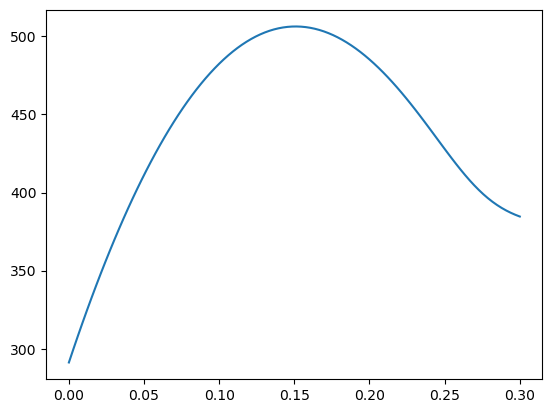

In [86]:
plt.plot(E_P_array, total_harvest)

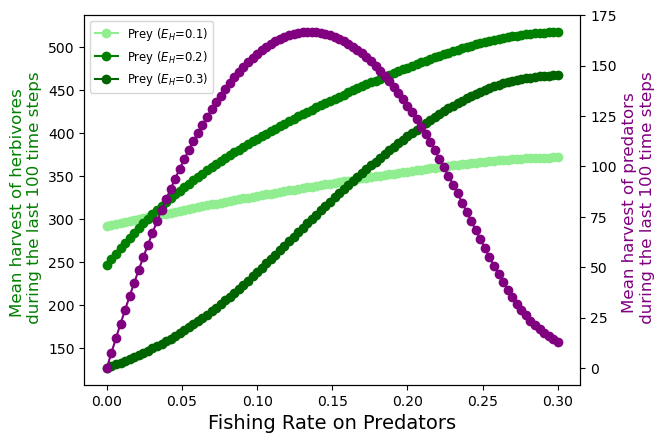

In [87]:
fig,ax = plt.subplots()
ax.plot(E_P_array, H_harvest_final_array1, color="lightgreen", marker="o")
ax.plot(E_P_array, H_harvest_final_array2, color="green", marker="o")
ax.plot(E_P_array, H_harvest_final_array3, color="darkgreen", marker="o")
ax.set_xlabel("Fishing Rate on Predators",fontsize=14)
ax.set_ylabel("Mean harvest of herbivores \n during the last 100 time steps",color="green",fontsize=12)
ax2=ax.twinx()
ax2.plot(E_P_array, P_harvest_final_array1,color="purple",marker="o")
ax2.set_ylabel("Mean harvest of predators \n during the last 100 time steps",color="purple",fontsize=12)
ax.legend(['Prey ($E_H$=0.1)','Prey ($E_H$=0.2)', 'Prey ($E_H$=0.3)'], fontsize="small")
plt.show()


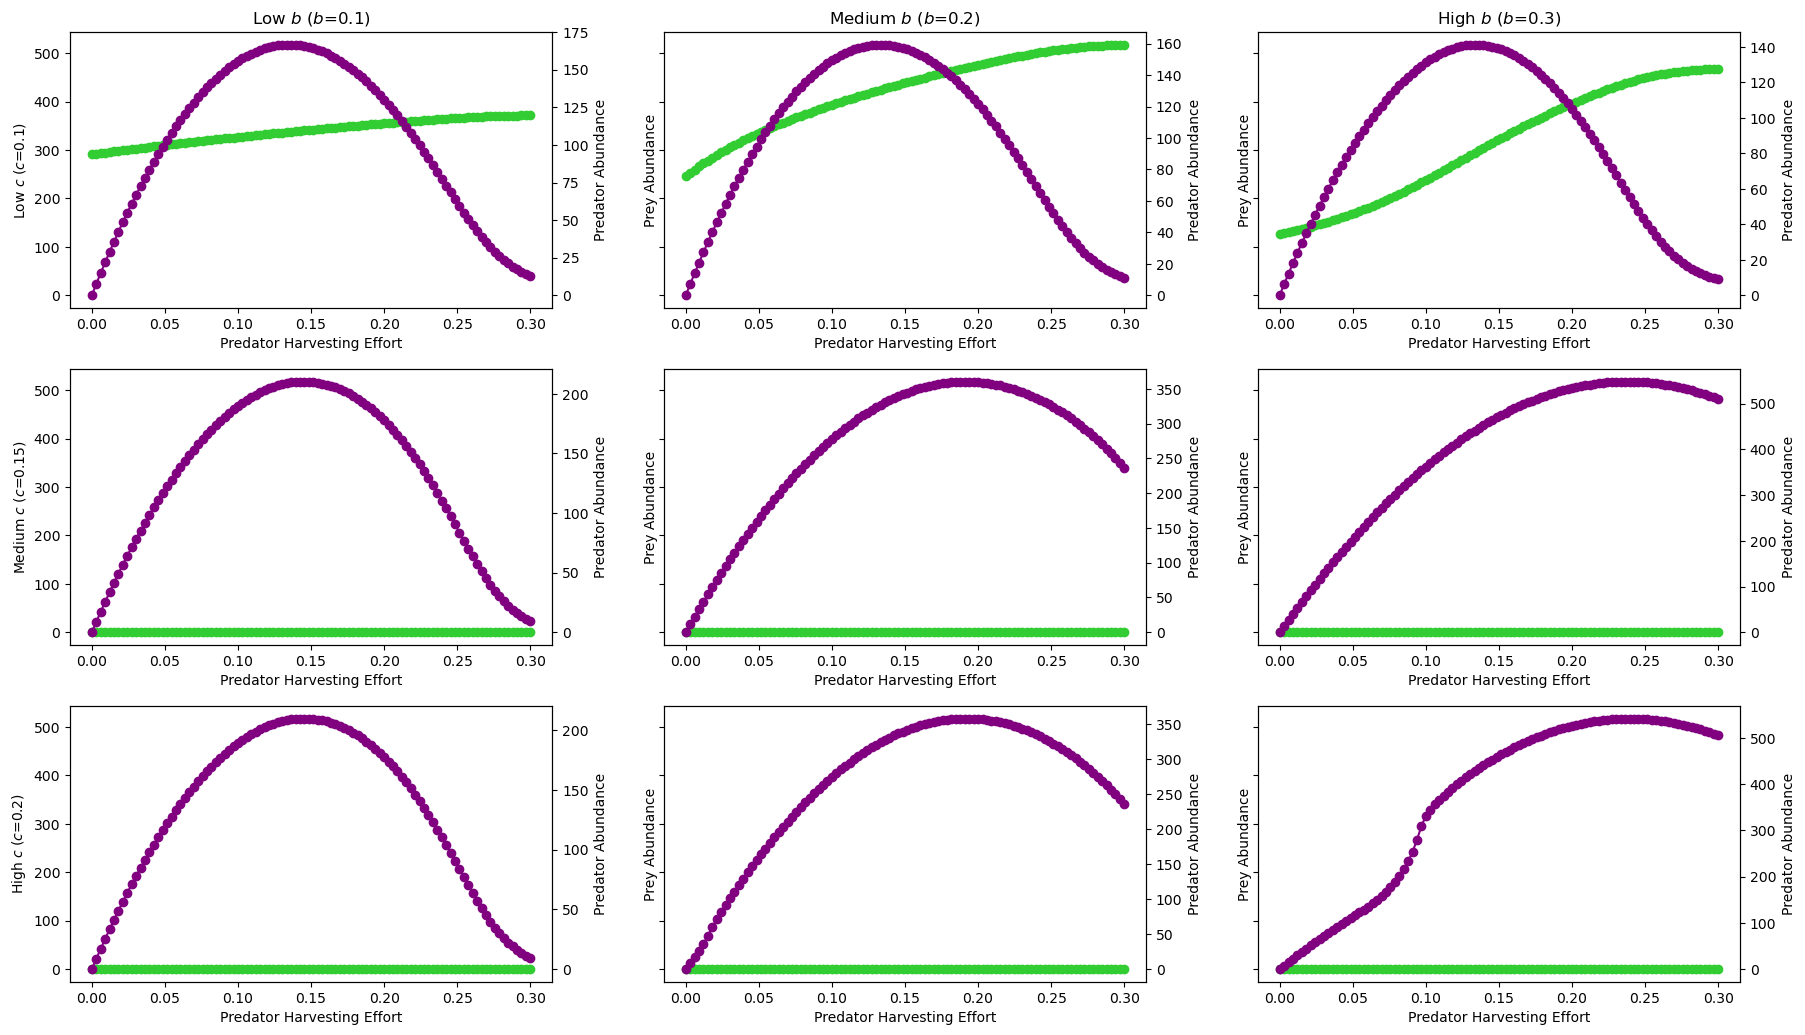

In [88]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize = (15,10), sharey= True)

ax1, ax1a = two_scales(ax1, E_P_array, H_harvest_final_array1, P_harvest_final_array1, 'limegreen', 'purple', 'o', 'o')
ax1.set_title("Low $b$ ($b$=0.1)")
ax1.set_ylabel("Low $c$ ($c$=0.1)")

ax2, ax2a = two_scales(ax2, E_P_array, H_harvest_final_array2, P_harvest_final_array2, 'limegreen', 'purple', 'o', 'o')
ax2.set_title("Medium $b$ ($b$=0.2)")

ax3, ax3a = two_scales(ax3, E_P_array, H_harvest_final_array3, P_harvest_final_array3, 'limegreen', 'purple', 'o', 'o')
ax3.set_title("High $b$ ($b$=0.3)")

ax4, ax4a = two_scales(ax4, E_P_array, H_harvest_final_array4, P_harvest_final_array4, 'limegreen', 'purple', 'o', 'o')
ax4.set_ylabel("Medium $c$ ($c$=0.15)")

ax5, ax5a = two_scales(ax5, E_P_array, H_harvest_final_array5, P_harvest_final_array5, 'limegreen', 'purple', 'o', 'o')

ax6, ax6a = two_scales(ax6, E_P_array, H_harvest_final_array6, P_harvest_final_array6, 'limegreen', 'purple', 'o', 'o')

ax7, ax7a = two_scales(ax7, E_P_array, H_harvest_final_array7, P_harvest_final_array7, 'limegreen', 'purple', 'o', 'o')
ax7.set_ylabel("High $c$ ($c$=0.2)")

ax8, ax8a = two_scales(ax8, E_P_array, H_harvest_final_array8, P_harvest_final_array8, 'limegreen', 'purple', 'o', 'o')

ax9, ax9a = two_scales(ax9, E_P_array, H_harvest_final_array9, P_harvest_final_array9, 'limegreen', 'purple', 'o', 'o')

#fig.suptitle('Time Series Varied $b$ and $c$ Values', fontsize=16)
plt.tight_layout()
fig.set_size_inches(18.5, 10.5)

# Nullclines - Draft - Full Vector Fields in Mathematica

### Plot 1

In [174]:
# Generate H Values for Plotting (x-axis) 
H1_vals = np.arange(1,5000) 

# Set Parameter Values
# Herbivore parameters:
r_H = 0.3 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.1 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest


sp1_nullcline1 = (((d + H1_vals)*((r_H*H1_vals)-(r_H*H1_vals**2)/K_H))/(c*H1_vals))
sp2_nullcline1 = K_P*((r_P*d + H1_vals*r_P + H1_vals*b)/(H1_vals*r_P + r_P*d))

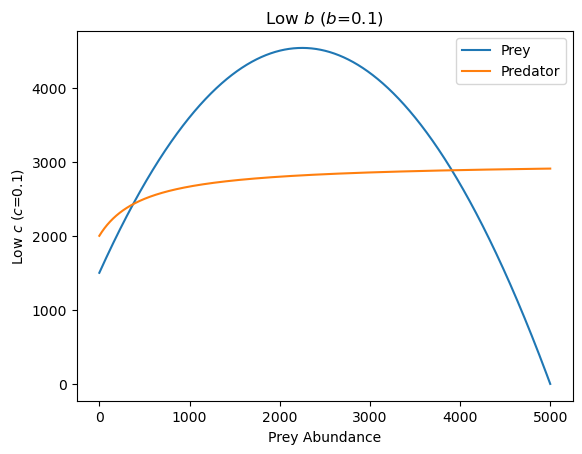

In [175]:
plt.plot(sp1_nullcline1)
plt.plot(sp2_nullcline1)
plt.title("Low $b$ ($b$=0.1)")
plt.ylabel("Low $c$ ($c$=0.1)")
plt.xlabel("Prey Abundance")
plt.legend(['Prey','Predator'])

In [34]:
# Generate H Values for Plotting (x-axis) 
H1_vals = np.arange(1,5000) 

# Set Parameter Values
# Herbivore parameters:
r_H = 0.3 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.1 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest


sp1_nullcline = (((d + H1_vals)*((r_H*H1_vals)-(r_H*H1_vals**2)/K_H))/(c*H1_vals))
sp2_nullcline = K_P*((r_P*d + H1_vals*r_P + H1_vals*b)/(H1_vals*r_P + r_P*d))

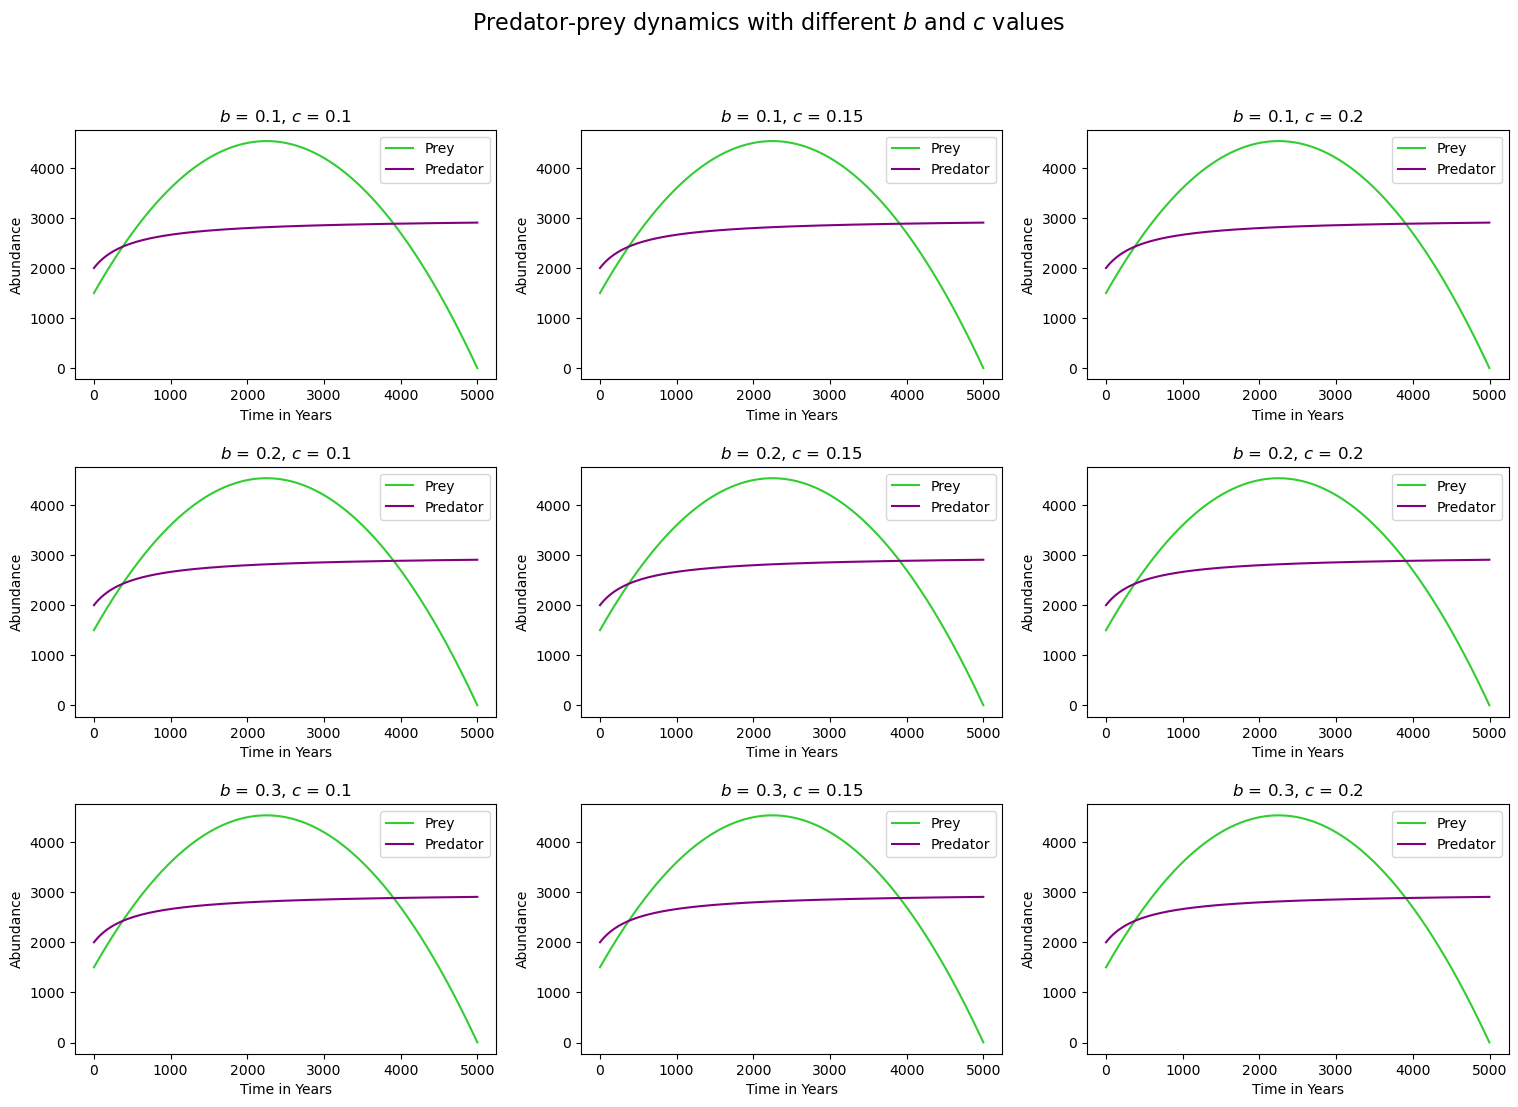

In [42]:
# Define the range of b and c values to plot
b_values = [0.1, 0.2, 0.3]
c_values = [0.1, 0.15, 0.2]
H1_vals = np.arange(1,5000) 

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(18.5, 12))

# Loop through each combination of b and c values
for i in range(3):
    for j in range(3):
        # Update the b and c values in the parameter dictionary
        parameters_dict['b'] = b_values[i]
        parameters_dict['c'] = c_values[j]
        
        # Run the model and extract H and P arrays
        sp1_nullcline = (((d + H1_vals)*((r_H*H1_vals)-(r_H*H1_vals**2)/K_H))/(c*H1_vals))
        sp2_nullcline = K_P*((r_P*d + H1_vals*r_P + H1_vals*b)/(H1_vals*r_P + r_P*d))
        
        # Plot the H and P arrays in the corresponding subplot
        axs[i,j].plot(sp1_nullcline, label='Prey', color="limegreen")
        axs[i,j].plot(sp2_nullcline, label='Predator', color="purple")
        axs[i,j].set_title(f'$b$ = {b_values[i]}, $c$ = {c_values[j]}')
        axs[i,j].set_xlabel('Time in Years')
        axs[i,j].set_ylabel('Abundance')
        axs[i,j].legend()

# Add a common title to the figure
fig.suptitle('Predator-prey dynamics with different $b$ and $c$ values', fontsize=16)
plt.subplots_adjust(wspace=0.2, hspace=0.35)
plt.show()

### Plot 2

In [176]:
# Generate H Values for Plotting (x-axis) 
H1_vals = np.arange(1,5000) 

# Set Parameter Values
# Herbivore parameters:
r_H = 0.3 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.2 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest


sp1_nullcline2 = (((d + H1_vals)*((r_H*H1_vals)-(r_H*H1_vals**2)/K_H))/(c*H1_vals))
sp2_nullcline2 = K_P*((r_P*d + H1_vals*r_P + H1_vals*b)/(H1_vals*r_P + r_P*d))

### Plot 3

In [177]:
# Generate H Values for Plotting (x-axis) 
H1_vals = np.arange(1,5000) 

# Set Parameter Values
# Herbivore parameters:
r_H = 0.3 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.1 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.3 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest


sp1_nullcline3 = (((d + H1_vals)*((r_H*H1_vals)-(r_H*H1_vals**2)/K_H))/(c*H1_vals))
sp2_nullcline3 = K_P*((r_P*d + H1_vals*r_P + H1_vals*b)/(H1_vals*r_P + r_P*d))

### Plot 4

In [178]:
# Generate H Values for Plotting (x-axis) 
H1_vals = np.arange(1,5000) 

# Set Parameter Values
# Herbivore parameters:
r_H = 0.3 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.15 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.1 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest


sp1_nullcline4 = (((d + H1_vals)*((r_H*H1_vals)-(r_H*H1_vals**2)/K_H))/(c*H1_vals))
sp2_nullcline4 = K_P*((r_P*d + H1_vals*r_P + H1_vals*b)/(H1_vals*r_P + r_P*d))

### Plot 5

In [179]:
# Generate H Values for Plotting (x-axis) 
H1_vals = np.arange(1,5000) 

# Set Parameter Values
# Herbivore parameters:
r_H = 0.3 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.15 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.2 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest


sp1_nullcline5 = (((d + H1_vals)*((r_H*H1_vals)-(r_H*H1_vals**2)/K_H))/(c*H1_vals))
sp2_nullcline5 = K_P*((r_P*d + H1_vals*r_P + H1_vals*b)/(H1_vals*r_P + r_P*d))

### Plot 6

In [180]:
# Generate H Values for Plotting (x-axis) 
H1_vals = np.arange(1,5000) 

# Set Parameter Values
# Herbivore parameters:
r_H = 0.3 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.15 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.3 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest


sp1_nullcline6 = (((d + H1_vals)*((r_H*H1_vals)-(r_H*H1_vals**2)/K_H))/(c*H1_vals))
sp2_nullcline6 = K_P*((r_P*d + H1_vals*r_P + H1_vals*b)/(H1_vals*r_P + r_P*d))

### Plot 7 

In [181]:
# Generate H Values for Plotting (x-axis) 
H1_vals = np.arange(1,5000) 

# Set Parameter Values
# Herbivore parameters:
r_H = 0.3 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.2 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.1 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest


sp1_nullcline7 = (((d + H1_vals)*((r_H*H1_vals)-(r_H*H1_vals**2)/K_H))/(c*H1_vals))
sp2_nullcline7 = K_P*((r_P*d + H1_vals*r_P + H1_vals*b)/(H1_vals*r_P + r_P*d))

### Plot 8 

In [182]:
# Generate H Values for Plotting (x-axis) 
H1_vals = np.arange(1,5000) 

# Set Parameter Values
# Herbivore parameters:
r_H = 0.3 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.2 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.2 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest


sp1_nullcline8 = (((d + H1_vals)*((r_H*H1_vals)-(r_H*H1_vals**2)/K_H))/(c*H1_vals))
sp2_nullcline8 = K_P*((r_P*d + H1_vals*r_P + H1_vals*b)/(H1_vals*r_P + r_P*d))

### Plot 9

In [183]:
# Generate H Values for Plotting (x-axis) 
H1_vals = np.arange(1,5000) 

# Set Parameter Values
# Herbivore parameters:
r_H = 0.3 # growth rate of herbivores
K_H = 5000 # carrying capacity of herbivores
theta_H = 50 # immigration of herbivores
c = 0.2 #additional mortality of H 
d = 500 # value of H when predation half its max value 
q_H = 1. # proportionality constant for herbivore harvest 
E_H = 0.0 # Effort for herbivore harvest (0.05 = limit cycle, 0.2 = stable state)
#Predator parameters:
r_P = 0.2 # growth rate of predator 
K_P = 2000 # carrying capactiy of predators
b = 0.3 # additional growth of P due to H
theta_P = 0 # immigration of predators 
q_P = 1. # proportionality constant for predator harvest 
E_P = 0.0 # Effort for predator harvest


sp1_nullcline9 = (((d + H1_vals)*((r_H*H1_vals)-(r_H*H1_vals**2)/K_H))/(c*H1_vals))
sp2_nullcline9 = K_P*((r_P*d + H1_vals*r_P + H1_vals*b)/(H1_vals*r_P + r_P*d))

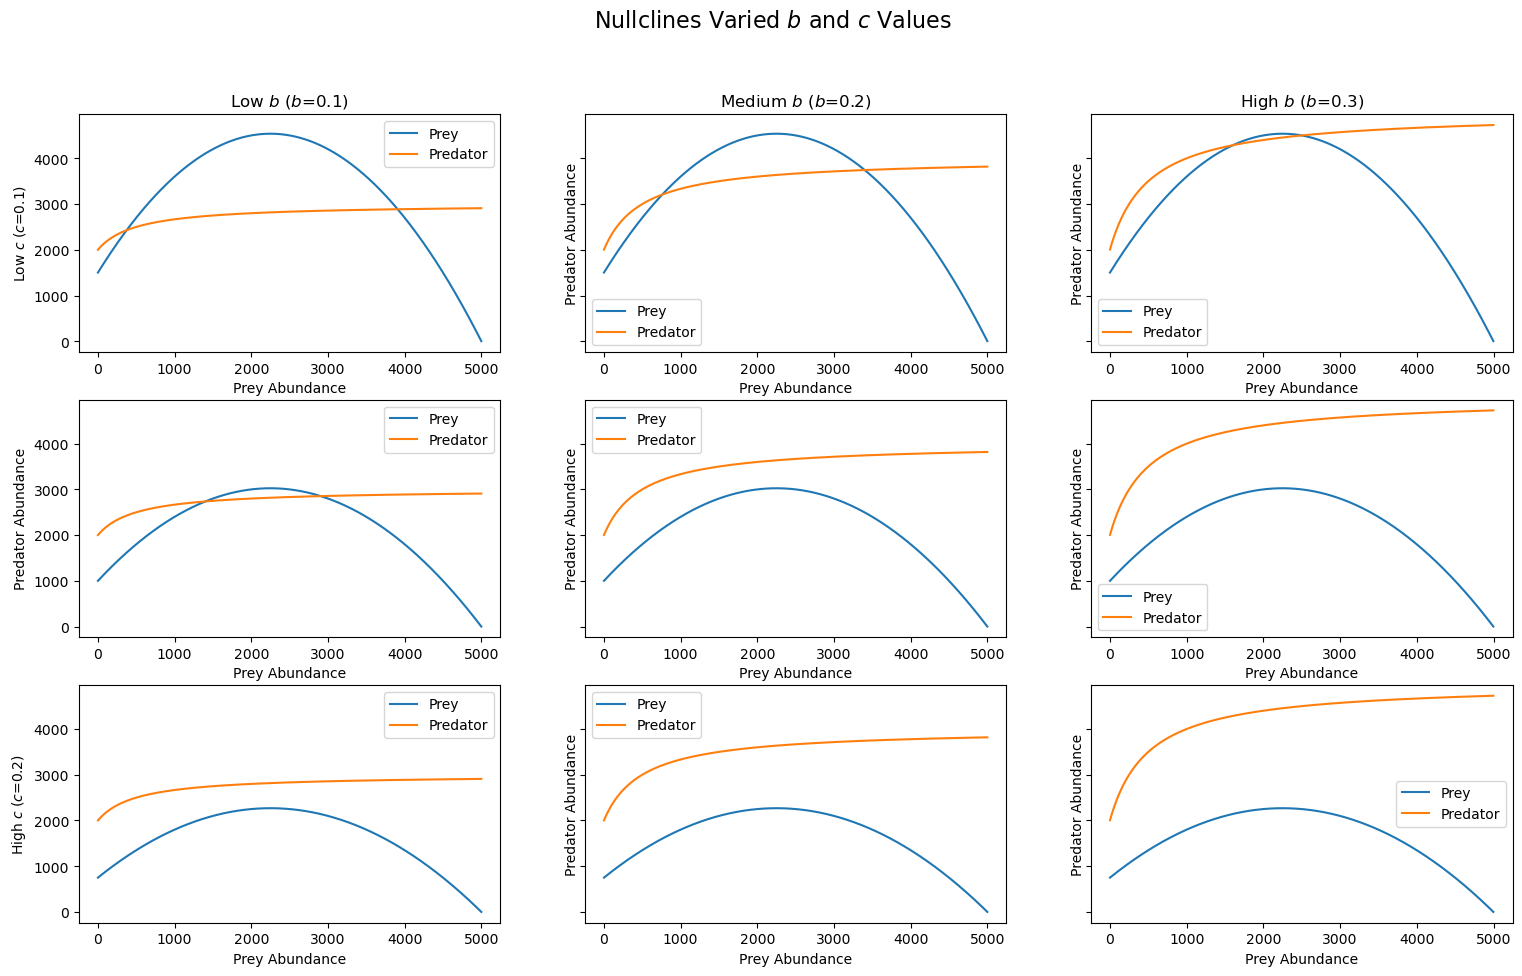

In [184]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharey= True)
ax1.plot(sp1_nullcline1)
ax1.plot(sp2_nullcline1)
ax1.set_title("Low $b$ ($b$=0.1)")
ax1.set_ylabel("Low $c$ ($c$=0.1)")
ax1.set_xlabel("Prey Abundance")
ax1.legend(['Prey','Predator'])

ax2.plot(sp1_nullcline2)
ax2.plot(sp2_nullcline2)
ax2.set_title("Medium $b$ ($b$=0.2)")
ax2.set_xlabel("Prey Abundance")
ax2.set_ylabel("Predator Abundance")
ax2.legend(['Prey','Predator'])

ax3.plot(sp1_nullcline3)
ax3.plot(sp2_nullcline3)
ax3.set_title("High $b$ ($b$=0.3)")
ax3.set_xlabel("Prey Abundance")
ax3.set_ylabel("Predator Abundance")
ax3.legend(['Prey','Predator'])

ax4.plot(sp1_nullcline4)
ax4.plot(sp2_nullcline4)
ax4.set_ylabel("Medium $c$ ($c$=0.15)")
ax4.set_xlabel("Prey Abundance")
ax4.set_ylabel("Predator Abundance")
ax4.legend(['Prey','Predator'])

ax5.plot(sp1_nullcline5)
ax5.plot(sp2_nullcline5)
ax5.set_xlabel("Prey Abundance")
ax5.set_ylabel("Predator Abundance")
ax5.legend(['Prey','Predator'])

ax6.plot(sp1_nullcline6)
ax6.plot(sp2_nullcline6)
ax6.set_xlabel("Prey Abundance")
ax6.set_ylabel("Predator Abundance")
ax6.legend(['Prey','Predator'])

ax7.plot(sp1_nullcline7)
ax7.plot(sp2_nullcline7)
ax7.set_xlabel("Prey Abundance")
ax7.set_ylabel("High $c$ ($c$=0.2)")
ax7.legend(['Prey','Predator'])

ax8.plot(sp1_nullcline8)
ax8.plot(sp2_nullcline8)
ax8.set_xlabel("Prey Abundance")
ax8.set_ylabel("Predator Abundance")
ax8.legend(['Prey','Predator'])

ax9.plot(sp1_nullcline9)
ax9.plot(sp2_nullcline9)
ax9.set_xlabel("Prey Abundance")
ax9.set_ylabel("Predator Abundance")
ax9.legend(['Prey','Predator'])

fig.suptitle('Nullclines Varied $b$ and $c$ Values', fontsize=16)
fig.set_size_inches(18.5, 10.5)
plt.savefig("ICRS_figures/Nullclines_3x3_fish.jpg",
            format='jpeg',
            dpi=300,
            bbox_inches='tight')